<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

<img src="https://i.imgur.com/r0JC3KU.png?1" style="float: left; margin: 15px 15px 0px 0px;">
## Solution


---


In [2]:
## Function to convert strings to float

def strtofloat(data):
    """argument have to be a list of list"""
    import re
    new_data = []
    for row in data:
        new_row = []
        for item in row:
            if  re.match("[+-]?(?:\d+(?:\.\d+)?|\.\d+)$", item):
                new_row.append(float(item))
            else:
                new_row.append(item)

        new_data.append(new_row)

    return new_data

In [3]:
## Open CSV file

with open('sat_scores.csv', 'rb') as f:
    reader = csv.reader(f)
    data_r = strtofloat(reader)

In [4]:
last_r = data_r[-1]
last_r

['All', 45.0, 506.0, 514.0]

In [5]:
# Assign header and data (remove last row)

header = data_r[0]
data = data_r[1:-1]

state = []
rate = []
verbal = []
math = []

for row in data:
        
    state.append(row[0])
    rate.append(row[1])
    verbal.append(row[2])
    math.append(row[3])
        
data_list = [state,rate,verbal,math]     
data_dict = dict(zip(header,data_list))

print (data_dict)

{'Math': [510.0, 513.0, 515.0, 505.0, 516.0, 499.0, 499.0, 506.0, 500.0, 501.0, 499.0, 510.0, 499.0, 489.0, 501.0, 488.0, 474.0, 526.0, 499.0, 527.0, 499.0, 515.0, 510.0, 517.0, 525.0, 515.0, 542.0, 439.0, 539.0, 512.0, 542.0, 553.0, 542.0, 589.0, 550.0, 545.0, 572.0, 589.0, 580.0, 554.0, 568.0, 561.0, 577.0, 562.0, 596.0, 550.0, 570.0, 603.0, 582.0, 599.0, 551.0], 'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS'], 'Rate': [82.0, 81.0, 79.0, 77.0, 72.0, 71.0, 71.0, 69.0, 69.0, 68.0, 67.0, 65.0, 65.0, 63.0, 60.0, 57.0, 56.0, 55.0, 54.0, 53.0, 53.0, 52.0, 51.0, 51.0, 34.0, 33.0, 31.0, 26.0, 23.0, 18.0, 17.0, 13.0, 13.0, 12.0, 12.0, 11.0, 11.0, 9.0, 9.0, 9.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 5.0, 5.0, 4.0, 4.0, 4.0], 'Verbal': [50

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

<img src="https://i.imgur.com/r0JC3KU.png?1" style="float: left; margin: 15px 15px 0px 0px;">
## Solution


---


In [6]:
# Convert SAT dictionary into Dataframe

dict_to_pd = pd.DataFrame(data_dict)

# dtypes
dict_to_pd.dtypes

Math      float64
Rate      float64
State      object
Verbal    float64
dtype: object

In [7]:
# Read CSV directly using pd.read_csv - remove last row

data_pd = pd.read_csv('sat_scores.csv')
data_pd.drop(51,axis=0,inplace=True)

# dtypes
data_pd.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

<img src="https://i.imgur.com/r0JC3KU.png?1" style="float: left; margin: 15px 15px 0px 0px;">
## Solution


---
<div style="width:900px;background:#F9EECF;border:1px solid black;text-align:center;padding:8px;">
<p><b>The dtype when we convert from dictionary to Dataframe will be a <span style="color:red">string type by default</span> UNLESS converted into a float of integer.

<br><br>The dtypes of data when we load it directly using pd.read_csv from the file will <span style="color:red">automatically be numeric.</span></b></p>
</div>



If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

<img src="https://i.imgur.com/r0JC3KU.png?1" style="float: left; margin: 15px 15px 0px 0px;">
## Solution


---


In [8]:
# First 10 rows of data

data_pd.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [9]:
# Find out more information about the data

data_pd.describe()

,Rate,Verbal,Math
count,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137
std,27.550681,33.360667,36.287393
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,503.000000
50%,33.000000,527.000000,525.000000
75%,64.000000,562.000000,557.500000
max,82.000000,593.000000,603.000000


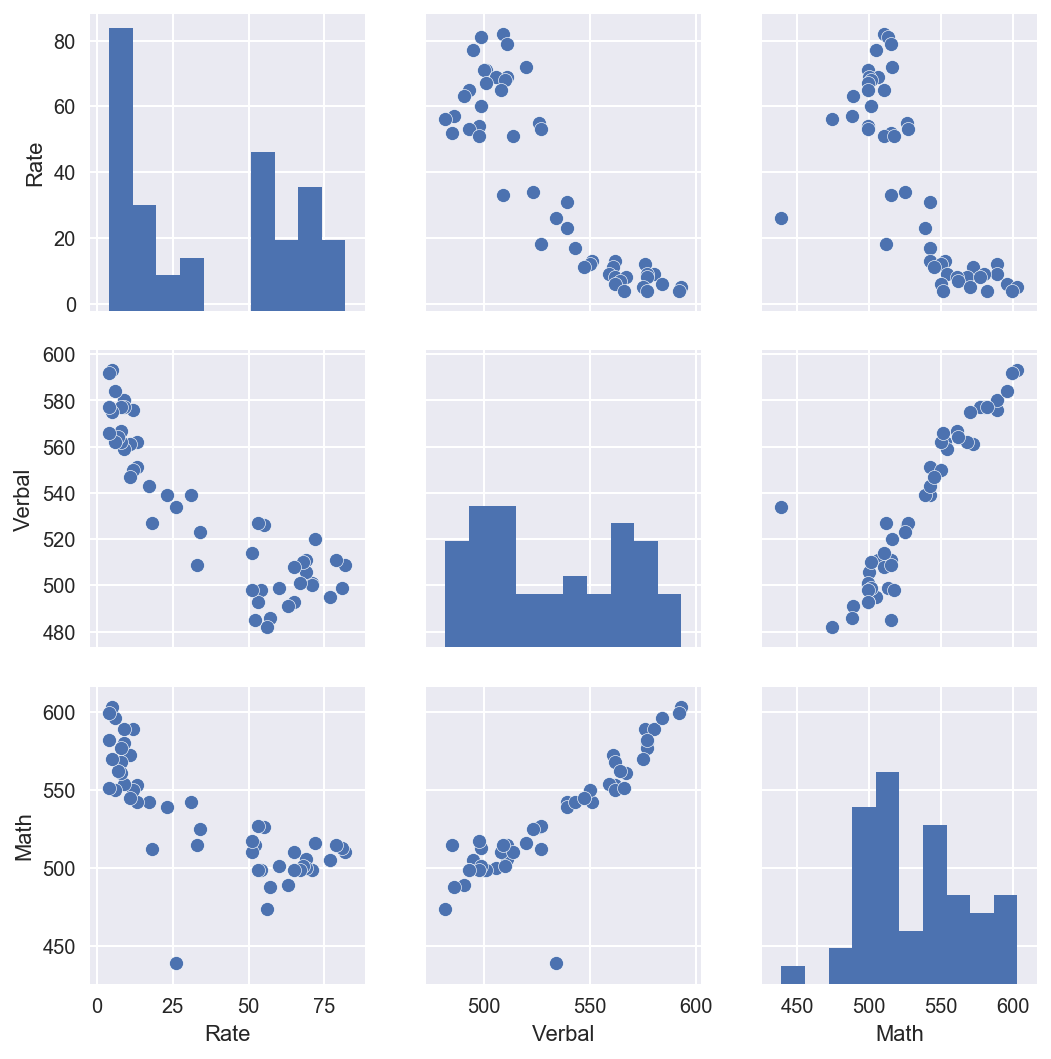

In [10]:
# Plot pairplot to visualise the relationship between the features

sns.pairplot(data_pd)

<img src="https://i.imgur.com/r0JC3KU.png?1" style="float: left; margin: 15px 15px 0px 0px;">
## Solution


---




<div style="width:900px;background:#F9EECF;border:1px solid black;text-align:center;padding:8px;">
<p><b>Research :</b> https://collegereadiness.collegeboard.org/sat/inside-the-test<br><br>

<b>Verbal:</b> (Mean, Median or Mode) Score for Verbal Test of each state (Max score of 800) <br>
<b>Math: </b>(Mean, Median or Mode) Score for Math Test of each state (Max score of 800)<br>
<b>Rate: </b>Failure rate (There seems to be inverse corelation with Verbal and Math)<br>
<br>
<b>Inference:</b> <u>Median Score</u> for Verbal and Math </p>
</div>

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

<img src="https://i.imgur.com/r0JC3KU.png?1" style="float: left; margin: 15px 15px 0px 0px;">
## Solution


---


In [11]:
# Create "Data Dictionary"

desc = ['column_name','type','description','data_shape']
col_name = ['State','Rate','Verbal','Math']
col_type = ['str','int','int','int']
col_desc = ['Abbrevation of each state','SAT failure rate (percentage)',
            'Median score for verbal test out of 800','Median score for math test out of 800']
shape = data_pd.shape

data = [col_name,col_type,col_desc]

data_dict = {desc[0]:data[0],
            desc[1]:data[1],
            desc[2]:data[2]}
data_dict
data_dict = pd.DataFrame(data_dict)

print 'Data shape = (Rows:Columns), ',shape
print data_dict


Data shape = (Rows:Columns),  (51, 4)
  column_name                              description type
0       State                Abbrevation of each state  str
1        Rate            SAT failure rate (percentage)  int
2      Verbal  Median score for verbal test out of 800  int
3        Math    Median score for math test out of 800  int


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

<img src="https://i.imgur.com/r0JC3KU.png?1" style="float: left; margin: 15px 15px 0px 0px;">
## Solution


---


In [12]:
# Customising figure size and assigning variable to data

sns.set(rc={"figure.figsize": (15, 8)})

rate = data_pd['Rate']
verbal = data_pd['Verbal']
math = data_pd['Math']

[<matplotlib.text.Text at 0x11bddec90>, <matplotlib.text.Text at 0x11c439750>]

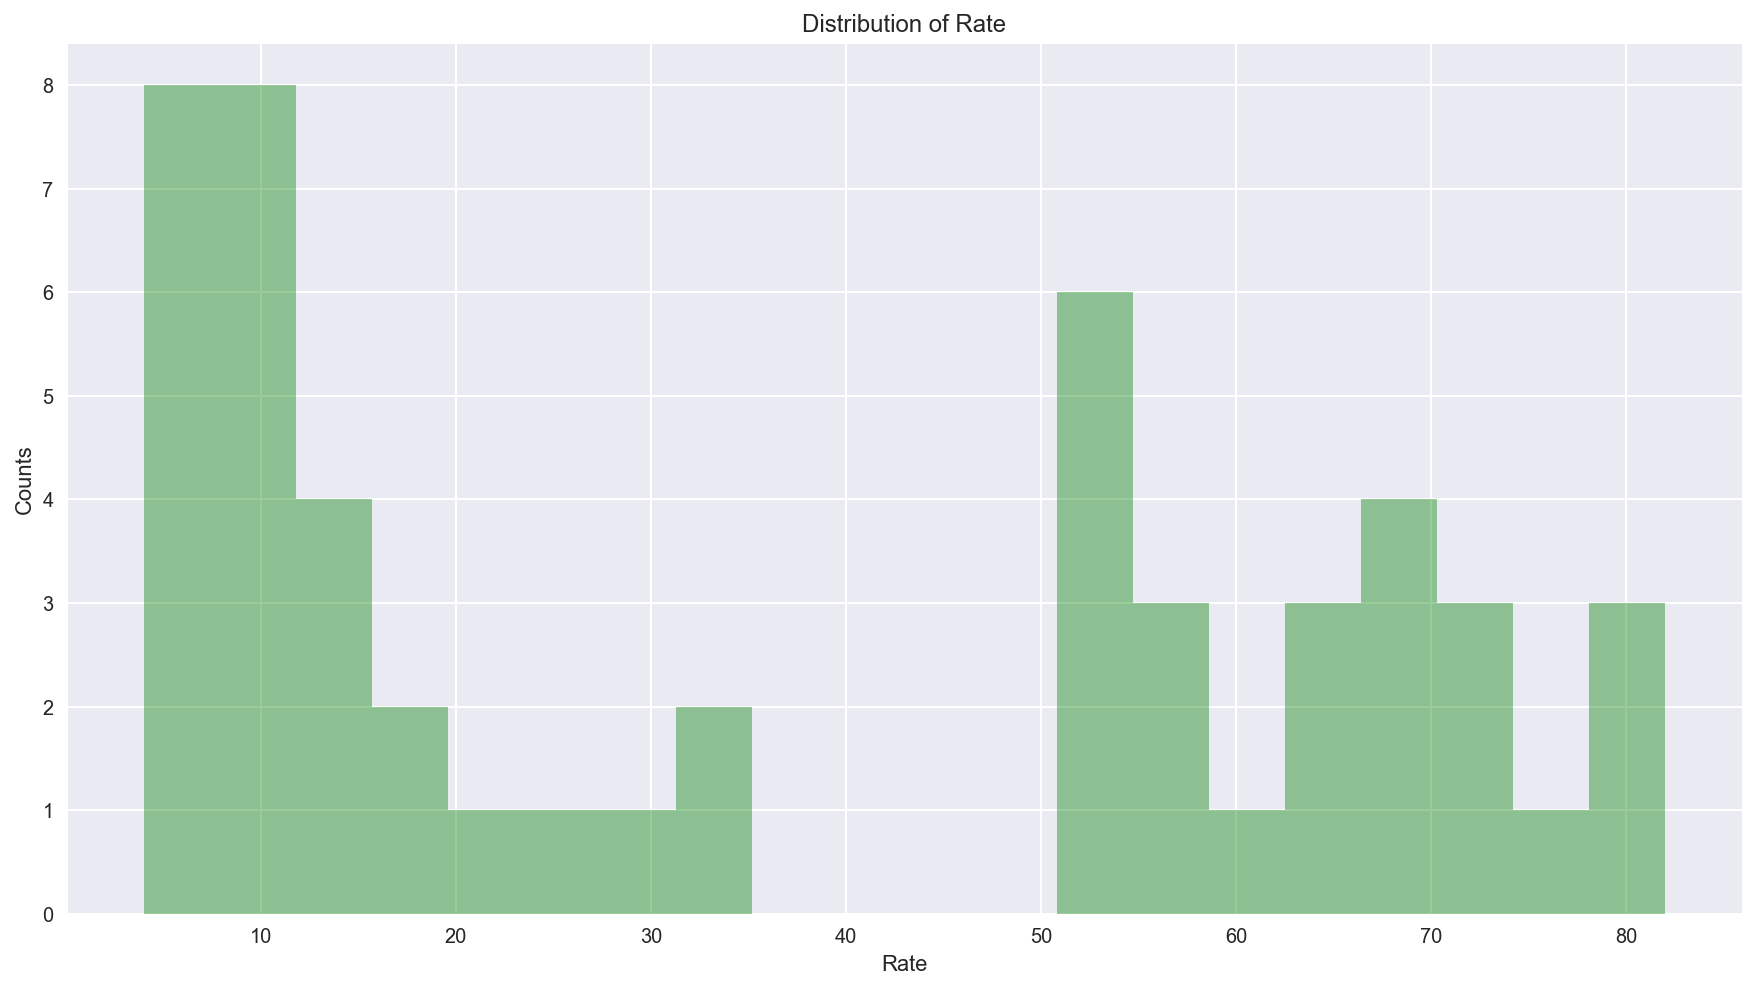

In [13]:
# Plot distrbution of Rate

ax_r = sns.distplot(rate,kde=False,bins=20,color='g')
ax_r.set(ylabel='Counts',title='Distribution of Rate')

[<matplotlib.text.Text at 0x11d383fd0>, <matplotlib.text.Text at 0x11d3ba490>]

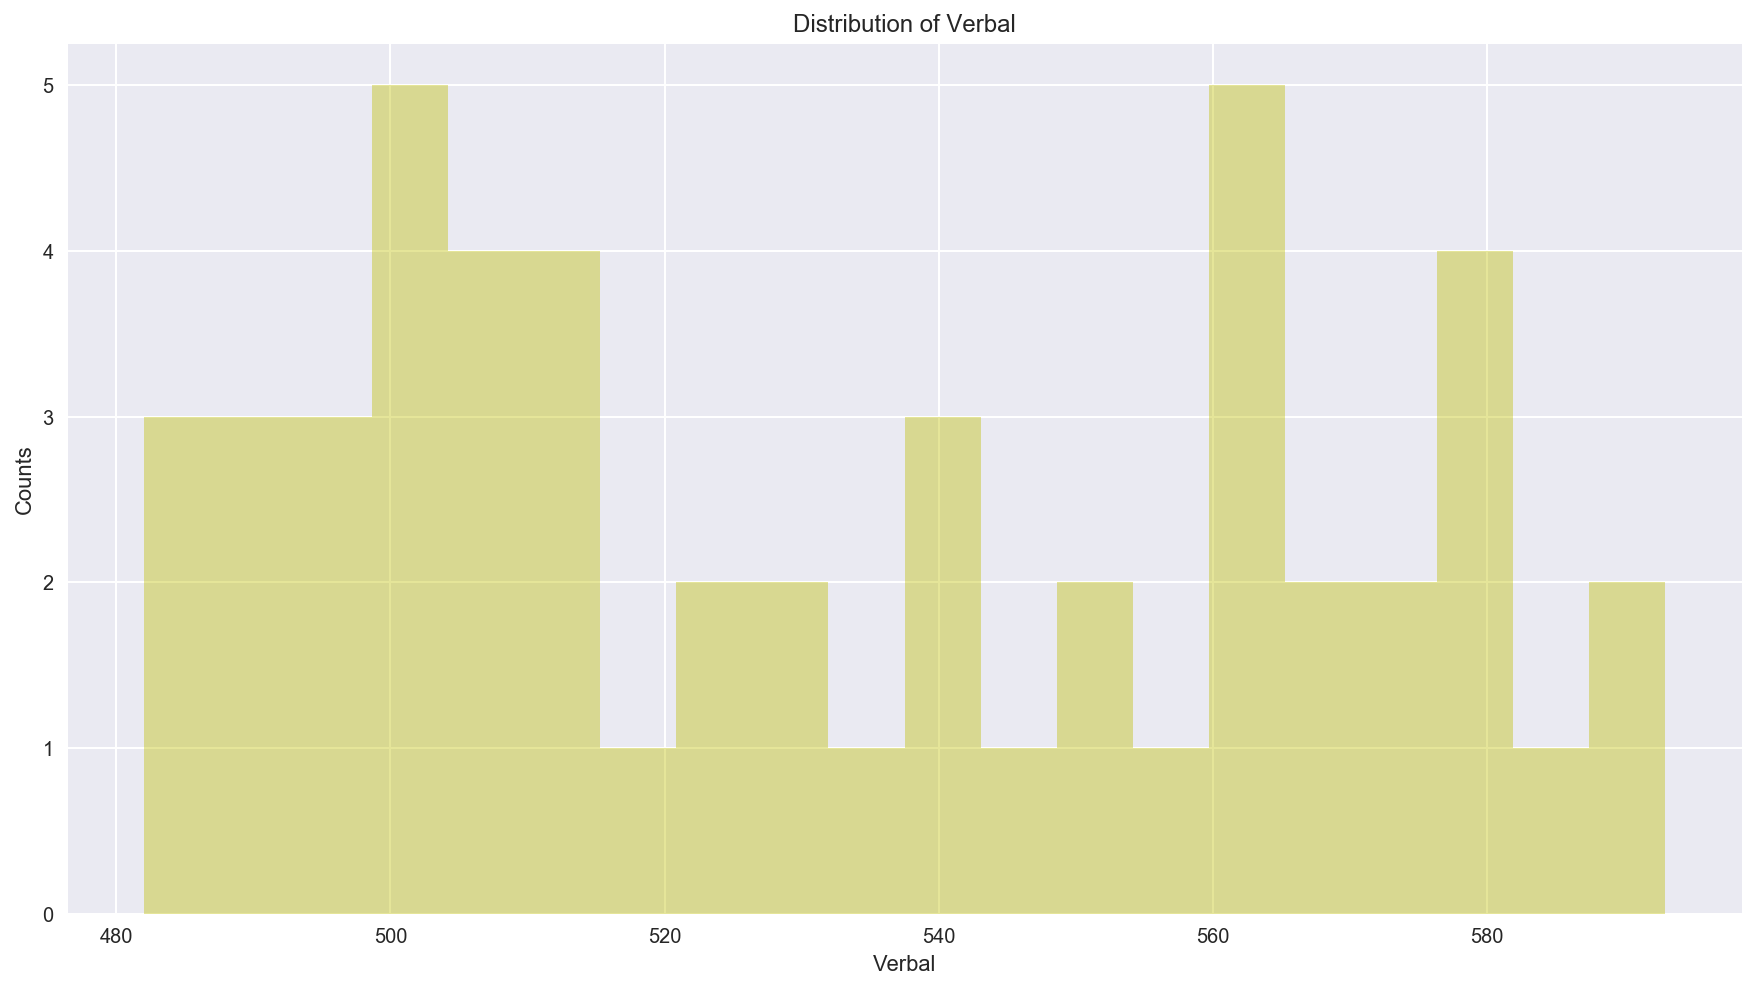

In [14]:
# Plot distribution of Verbal

ax_v = sns.distplot(verbal,kde=False,bins=20,color = 'y')
ax_v.set(ylabel='Counts',title='Distribution of Verbal')

[<matplotlib.text.Text at 0x11db5a090>, <matplotlib.text.Text at 0x11e2228d0>]

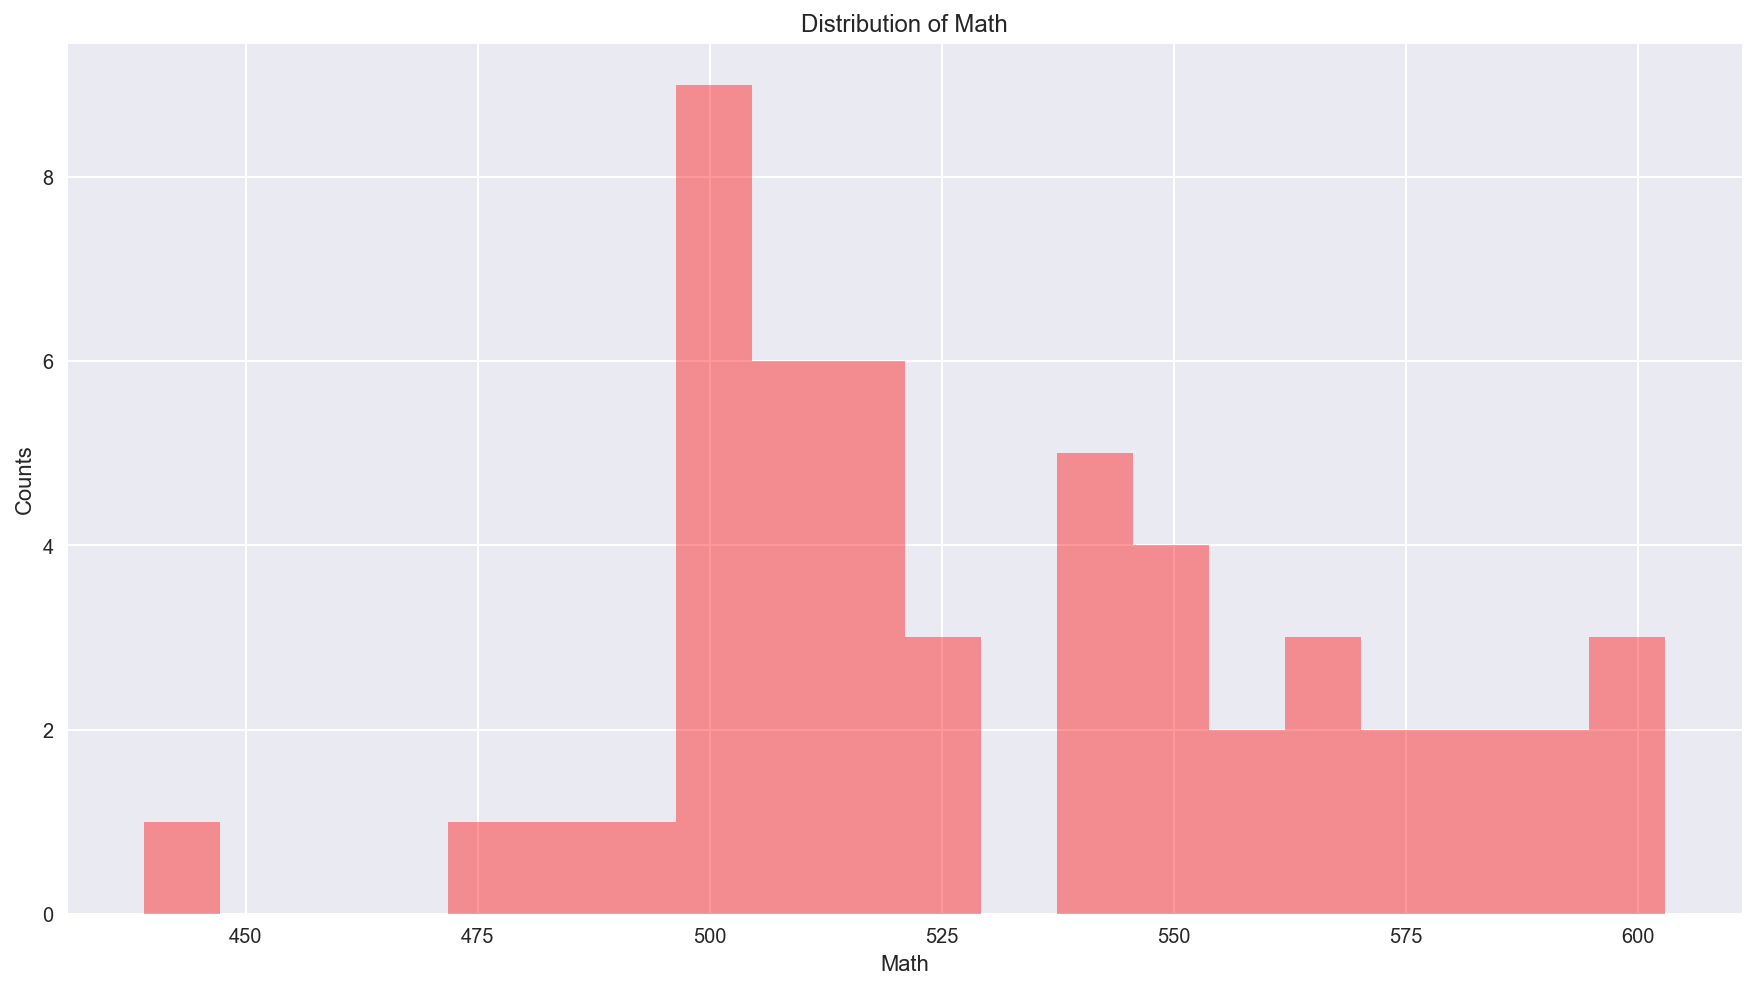

In [15]:
# Plot distribution of Math

ax_m = sns.distplot(math,kde=False,bins=20,color='r')
ax_m.set(ylabel='Counts',title='Distribution of Math')

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

<img src="https://i.imgur.com/r0JC3KU.png?1" style="float: left; margin: 15px 15px 0px 0px;">
## Solution


---


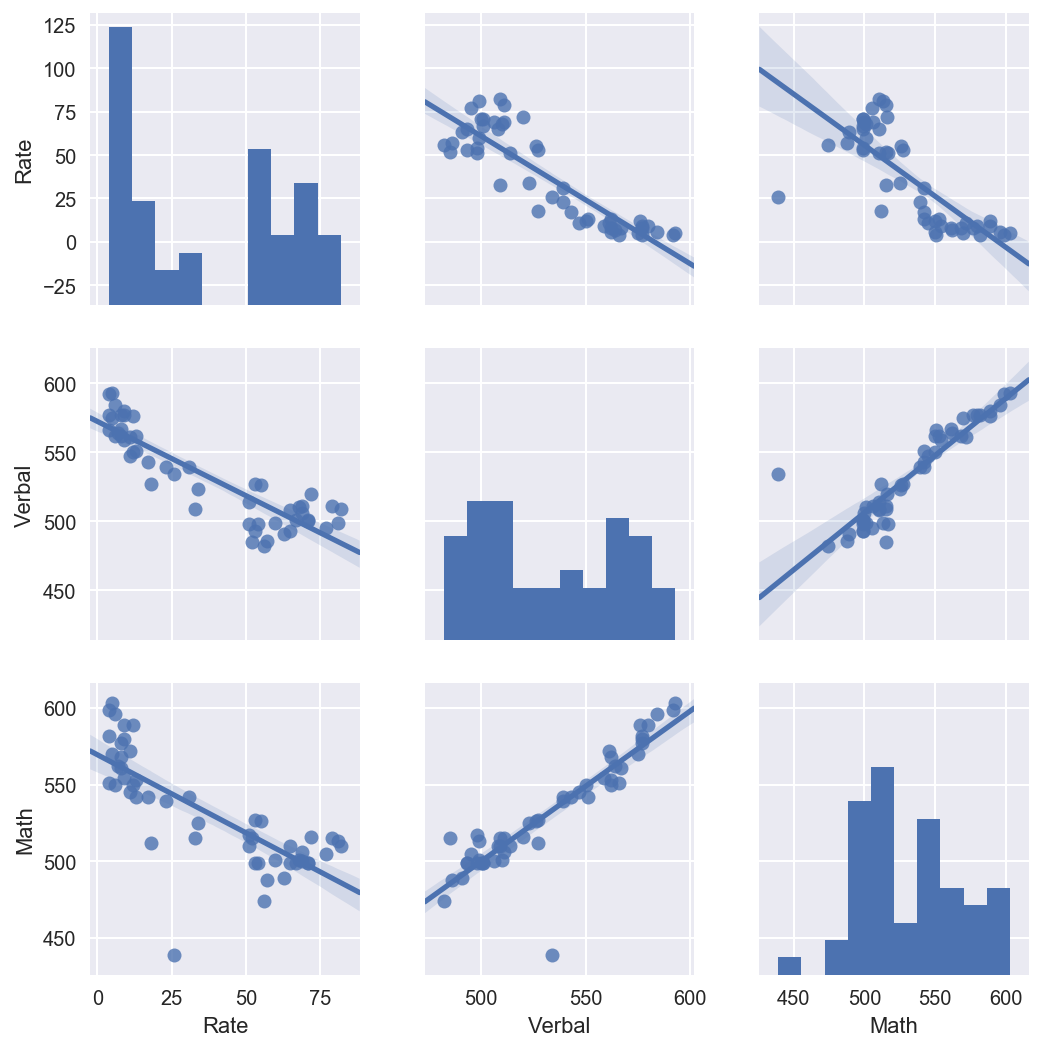

In [16]:
# Plot pairplot

sns.pairplot(data_pd,kind="reg")

<img src="https://i.imgur.com/r0JC3KU.png?1" style="float: left; margin: 15px 15px 0px 0px;">
## Solution


---




<div style="width:900px;background:#F9EECF;border:1px solid black;text-align:center;padding:8px;">
<p><b> Observation: </b>
<br>There is a positive co-relation between Math and Verbal
<br>There is a negative co-relation between Rate and Math (and Verbal)</p>
</div>






<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

<img src="https://i.imgur.com/r0JC3KU.png?1" style="float: left; margin: 15px 15px 0px 0px;">
## Solution


---


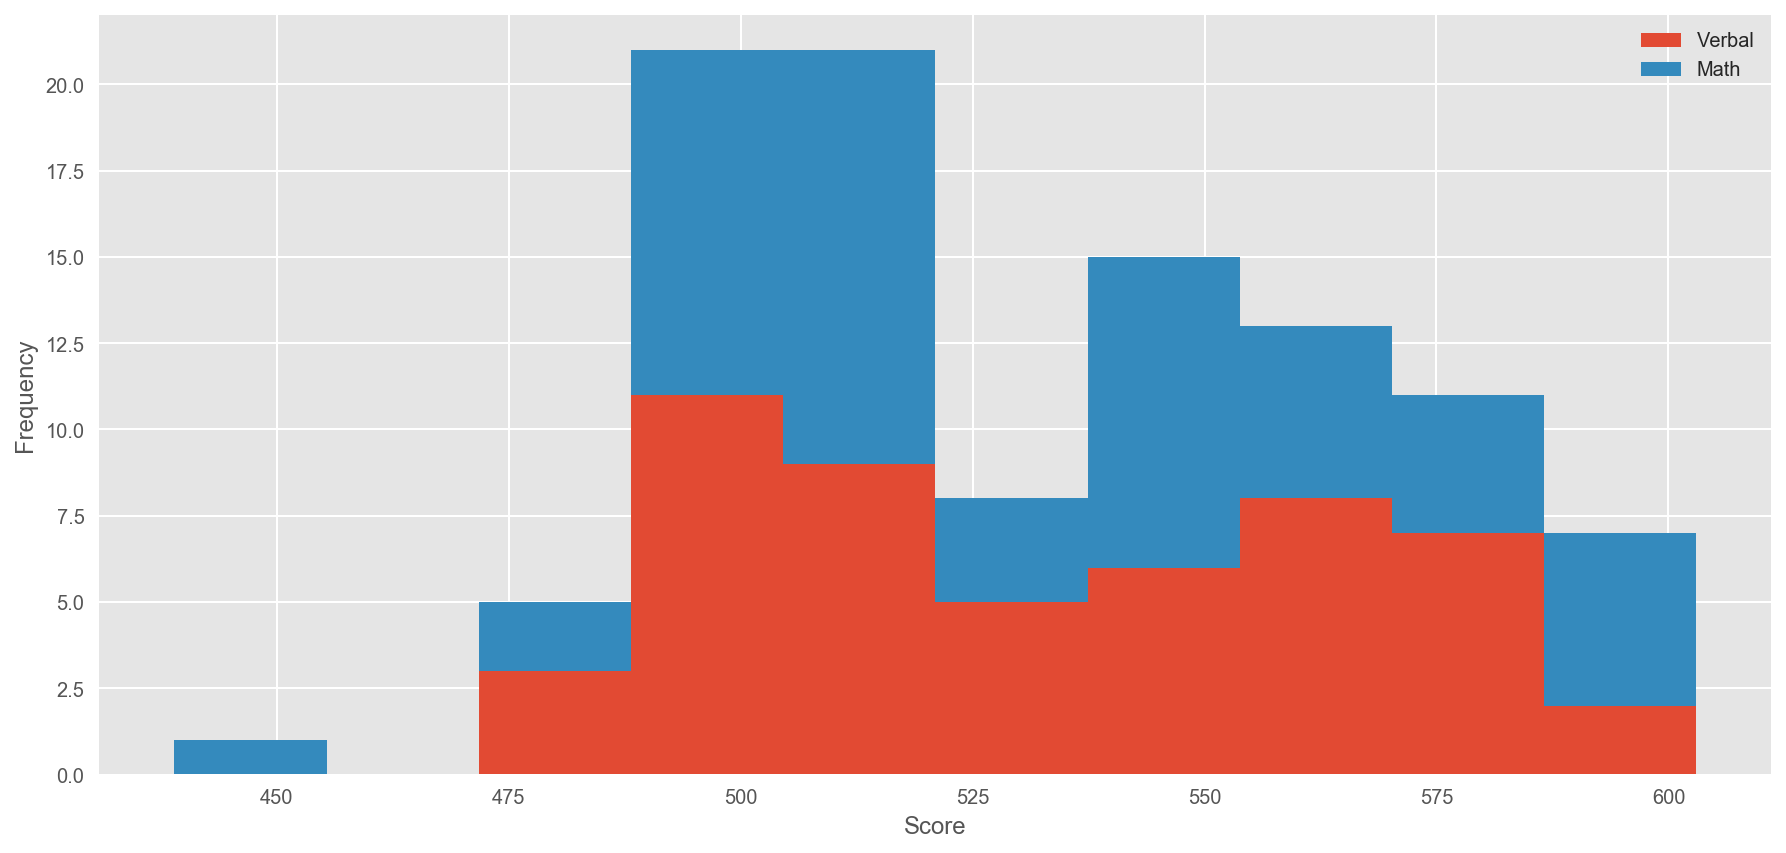

In [17]:
# Plot stacked histogram

import matplotlib.pyplot as plt
plt.style.use('ggplot')

data_pd[['Verbal', 'Math']].plot(kind='hist', stacked=True, figsize=(15,7))
plt.xlabel('Score')

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

<img src="https://i.imgur.com/r0JC3KU.png?1" style="float: left; margin: 15px 15px 0px 0px;">
## Solution


---



<div style="width:900px;background:#F9EECF;border:1px solid black;text-align:center;padding:8px;">
<p><b>Scatterplot vs Box-plot vs Histogram</b>
<br><br>
<span style="color:blue"><b>Scatterplot</b></span> - able to visualise the corelation between the two variables + visualise outliers
<br> <span style="color:blue"><b>Histogram</b></span> - only able to see the distribution of one variable
<br><br> <span style="color:blue"><b>Box-plot</b></span> - able to compare the median and percentiles between two variables + visualise the outliers
</p>
</div>




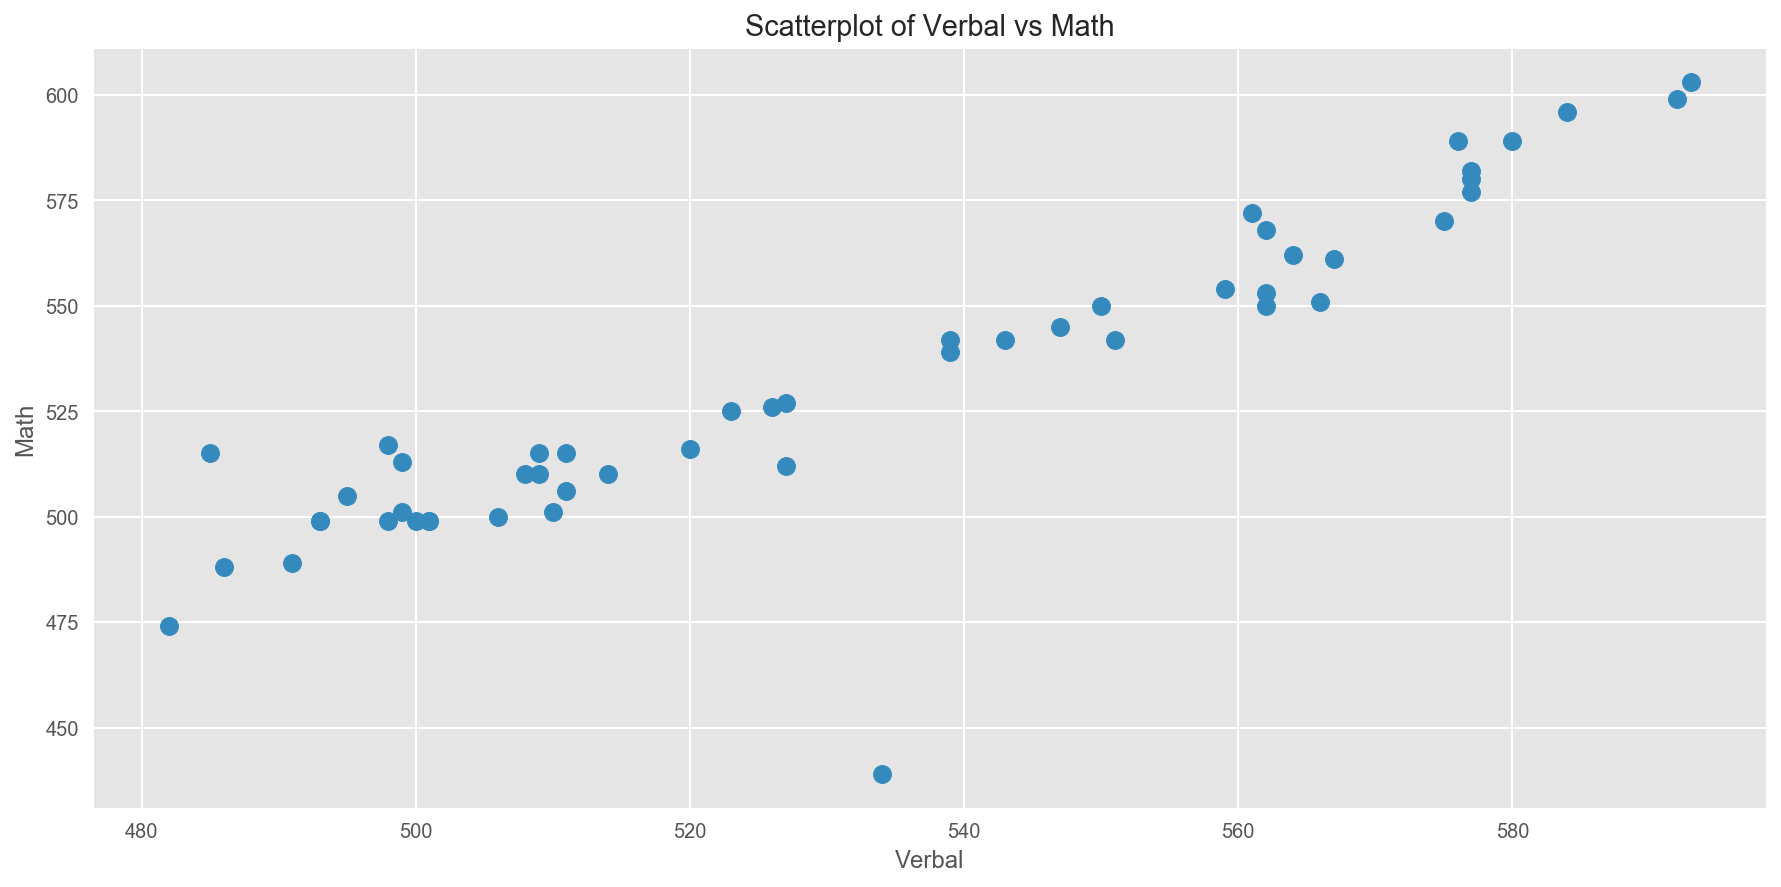

In [18]:
# Plot Scatterplot 

data_pd.plot.scatter('Verbal','Math', figsize=(15,7),s=80)
plt.title('Scatterplot of Verbal vs Math')

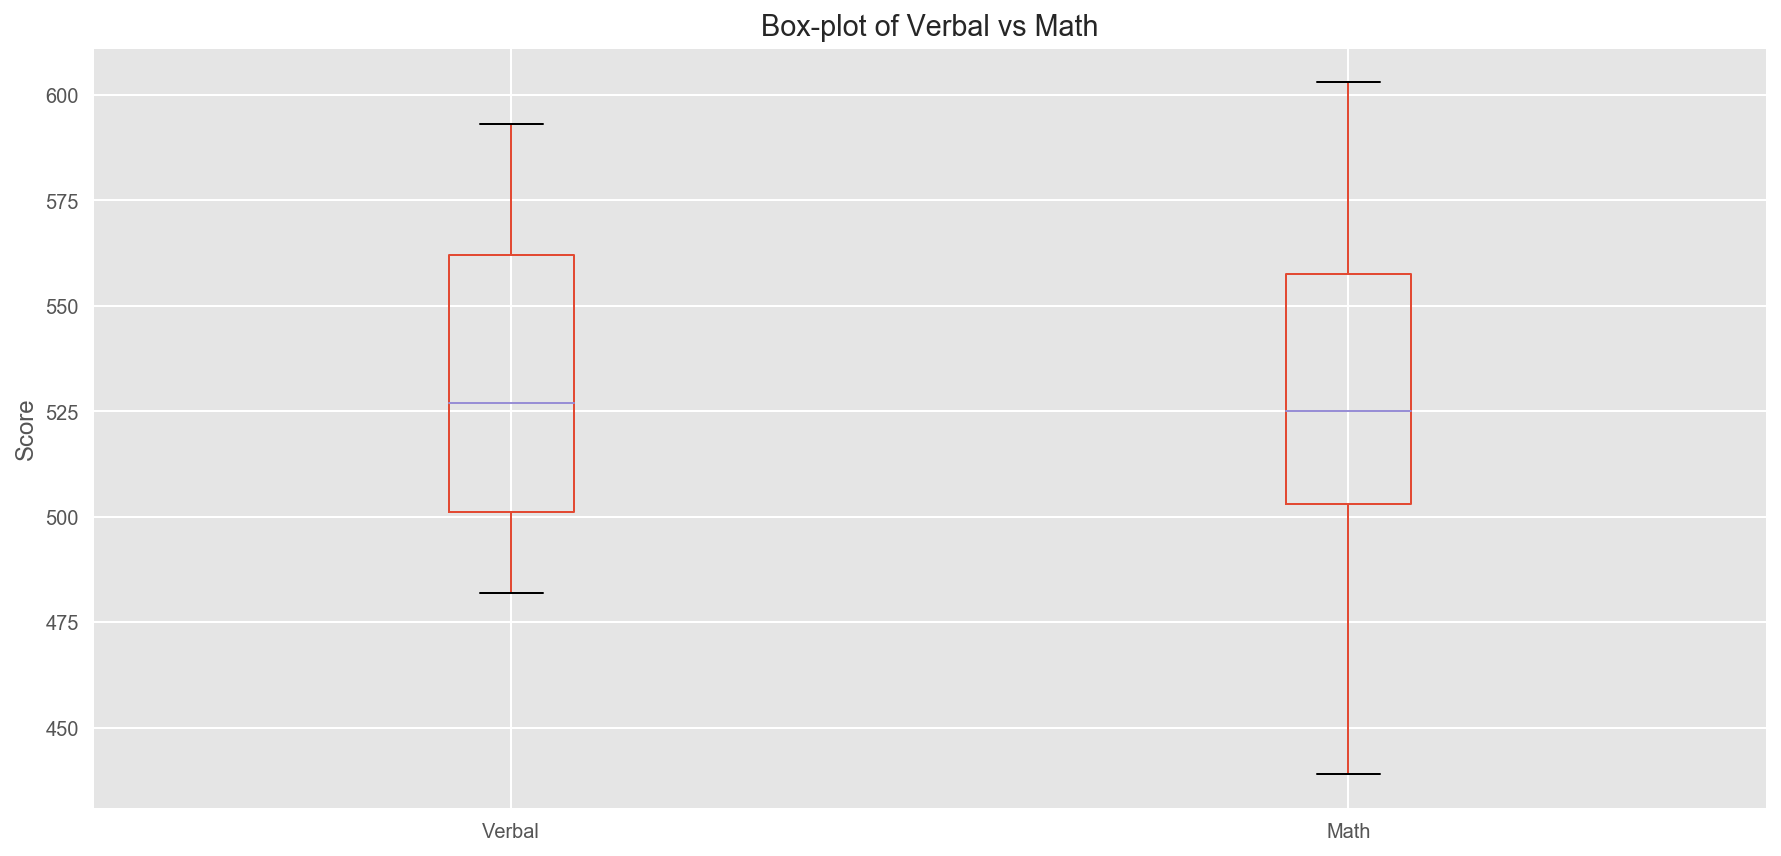

In [19]:
# Plot Box-plot

data_pd[['Verbal', 'Math']].plot(kind='box', figsize=(15,7))
plt.title('Box-plot of Verbal vs Math')
plt.ylabel('Score')

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


<img src="https://i.imgur.com/r0JC3KU.png?1" style="float: left; margin: 15px 15px 0px 0px;">
## Solution


---





<div style="width:900px;background:#F9EECF;border:1px solid black;text-align:center;padding:8px;">
<p><b>Oberservation: </b>
<br>As Rate uses different scale from Verbal and Math, the combined chart is not a good data visualisation for comparison 
<br><br><b> Recommended solution:</b>
<br> To normalise the scales
</p>
</div>

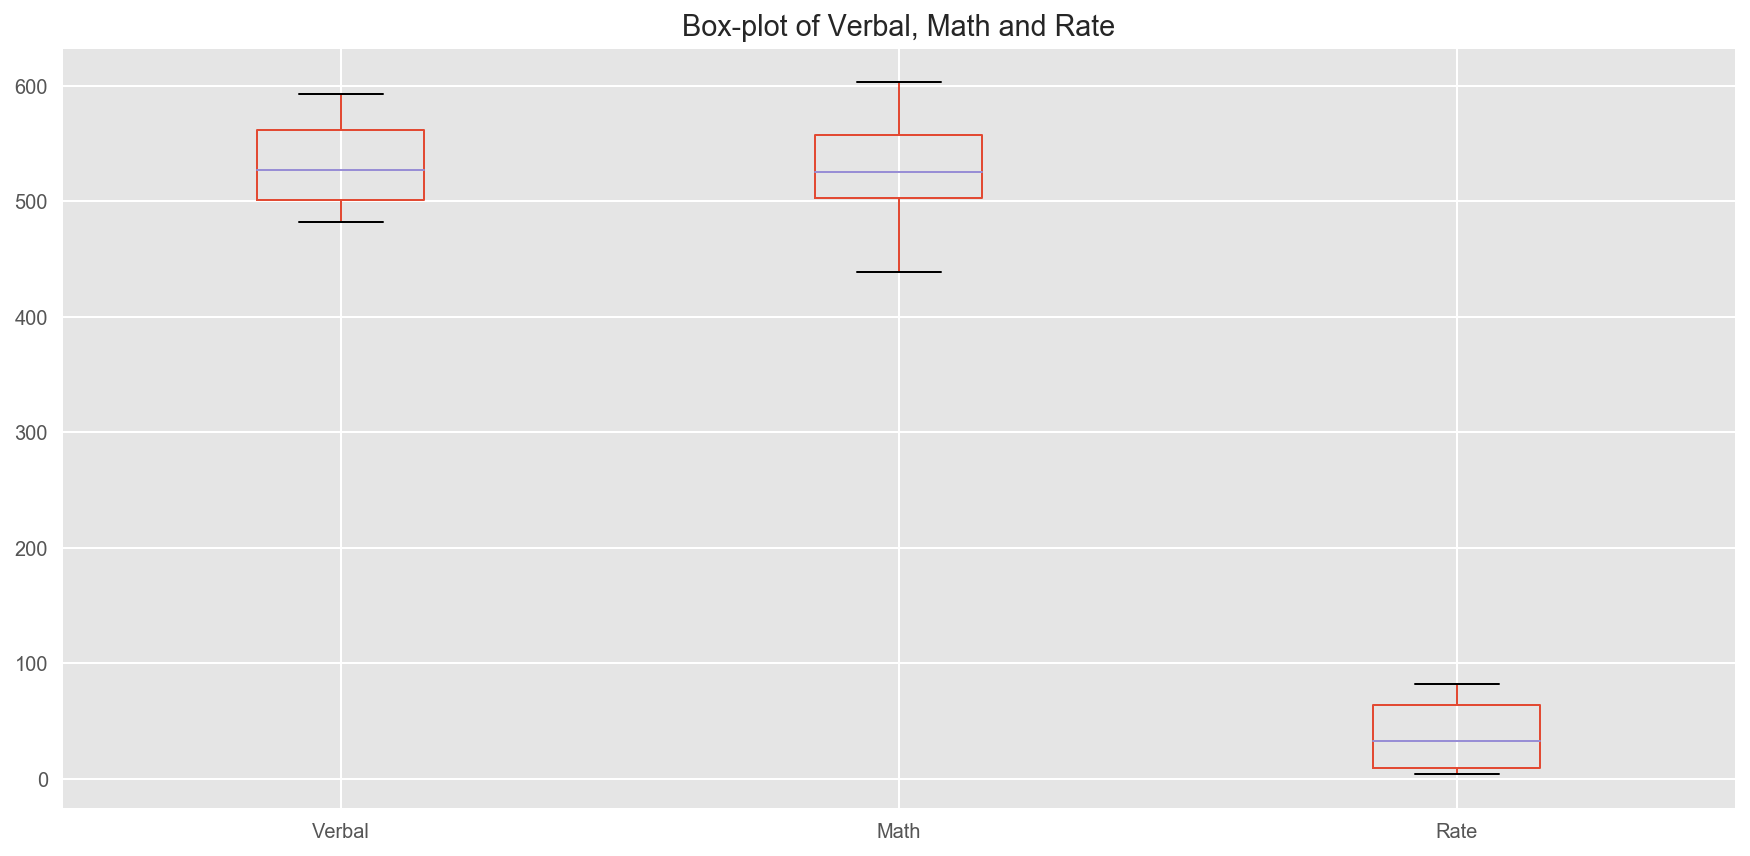

In [20]:
# Plot box-plot of Verbal, Math and Rate in one chart

data_pd[['Verbal', 'Math','Rate']].plot(kind='box', figsize=(15,7))
plt.title('Box-plot of Verbal, Math and Rate')



<div style="width:900px;background:#F9EECF;border:1px solid black;text-align:center;padding:8px;">
<p style="text-align:center"><b> Normalise the scale - Formula</b>
<br>standardized_variable = (variable - mean_of_variable) / std_dev_of_variable
</p>
</div>

In [21]:
# Create new dataframe

data_pd_n = pd.DataFrame(columns=data_pd.columns)

In [22]:
data_pd_n['State'] = data_pd['State']

In [23]:
# Normalise Verbal Function

def standardize(value):
        value = (value - (data_pd['Verbal'].mean()))/data_pd['Verbal'].std()
        return value

In [24]:
data_pd_n['Verbal'] = data_pd['Verbal'].apply(standardize)

In [25]:
# Normalise Math Function

def standardize2(value):
        value = (value - (data_pd['Math'].mean()))/data_pd['Math'].std()
        return value

In [26]:
data_pd_n['Math'] = data_pd['Math'].apply(standardize2)

In [27]:
# Normalise Rate Function

def standardize3(value):
        value = (value - (data_pd['Rate'].mean()))/data_pd['Rate'].std()
        return value

In [28]:
data_pd_n['Rate'] = data_pd['Rate'].apply(standardize3)

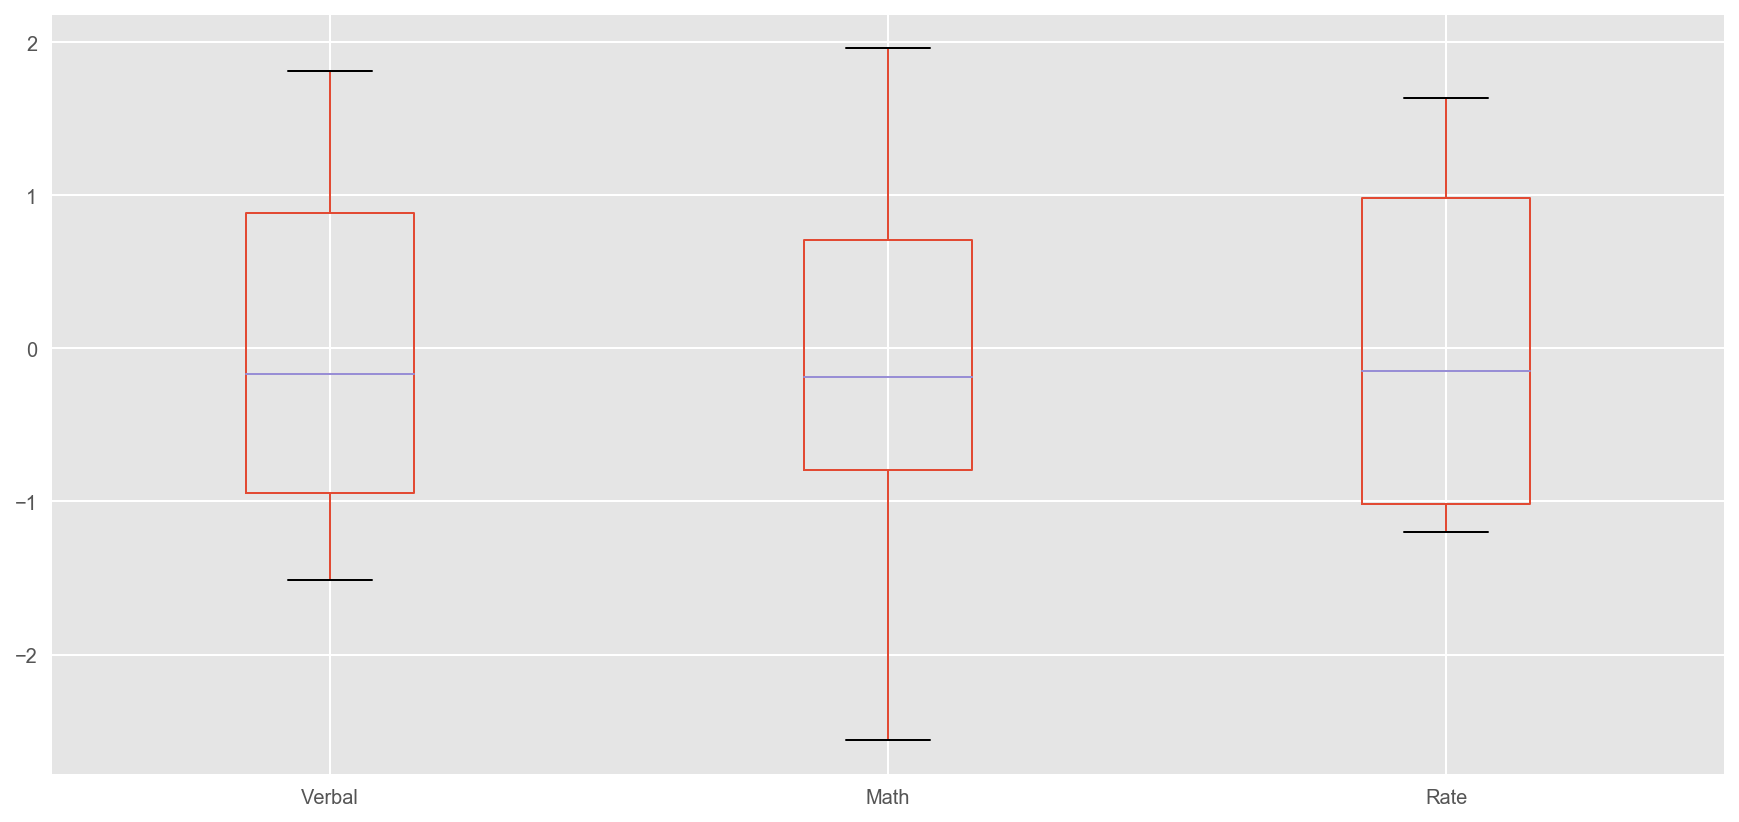

In [29]:
# Plot Normalised Data

data_pd_n[['Verbal','Math','Rate']].plot(kind='box', figsize=(15,7))

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




<img src="https://i.imgur.com/r0JC3KU.png?1" style="float: left; margin: 15px 15px 0px 0px;">
## Solution


---





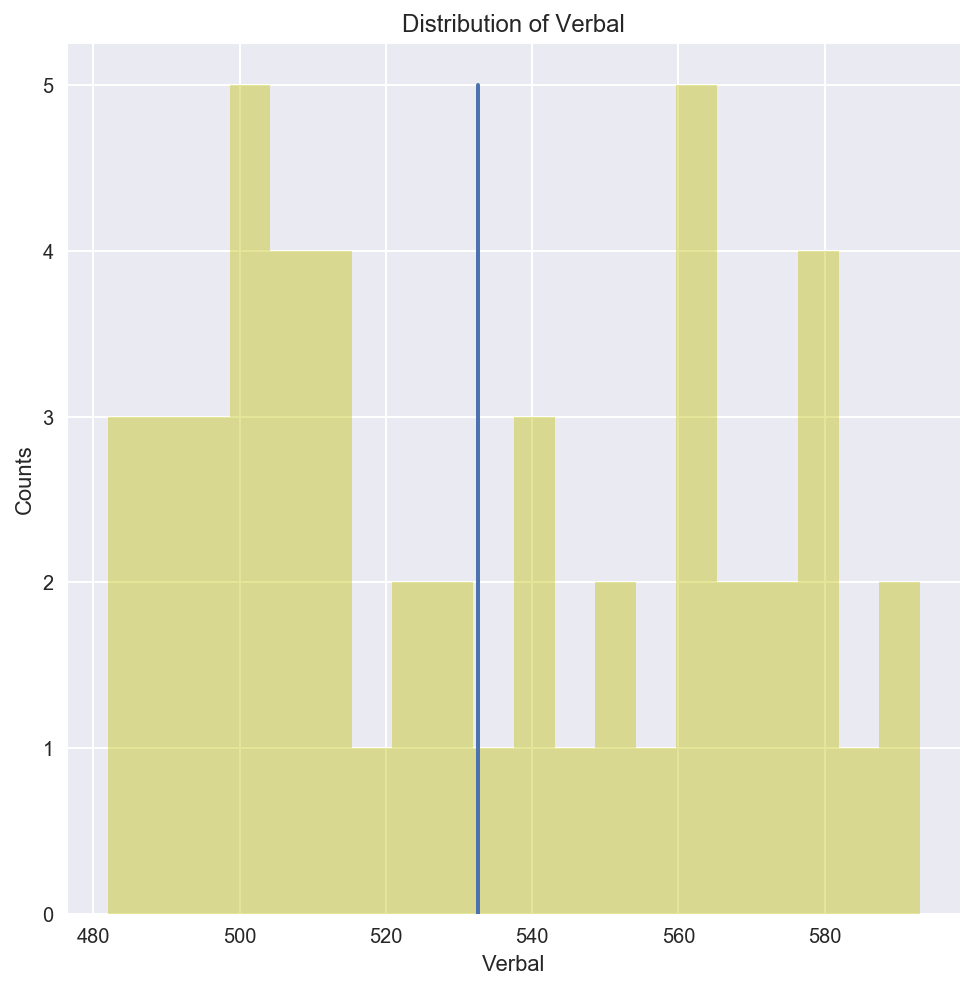

In [30]:
# Plot distribution of Verbal

sns.set(rc={"figure.figsize": (8, 8)})
ax_v = sns.distplot(data_pd.Verbal,kde=False,bins=20,color = 'y')
ax_v.set(ylabel='Counts',title='Distribution of Verbal')
mean = plt.plot([data_pd.Verbal.mean(), data_pd.Verbal.mean()], [0, 5], linewidth=2)

In [31]:
data_mask = data_pd.Verbal>data_pd.Verbal.mean()
list_states = data_pd[data_mask]['State']
print 'list of states above the mean: ',list(list_states)
print list_states.count(),' states are above the mean'

list of states above the mean:  ['CO', 'OH', 'MT', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']
24  states are above the mean



<div style="width:900px;background:#F9EECF;border:1px solid black;text-align:center;padding:8px;">
<p>
<b>How many states are above the mean? </b>
<br>
24 out of 52 states are above the mean of Verbal scores
<br>
<br><b>What does this tell you about the distribution of Verbal scores?</b>
<br>Looking at the graph, distribution of Verbal score is non-symmetric and bimodal.
</p>
</div>

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

<img src="https://i.imgur.com/r0JC3KU.png?1" style="float: left; margin: 15px 15px 0px 0px;">
## Solution


---



In [32]:
data_mask2 = data_pd.Verbal>data_pd.Verbal.median()
list_states2 = data_pd[data_mask2]['State']
print 'list of states above the median: ',list(list_states)
print list_states2.count(),' states are above the median'

list of states above the median:  ['CO', 'OH', 'MT', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']
24  states are above the median


<div style="width:900px;background:#F9EECF;border:1px solid black;text-align:center;padding:8px;">
<p>

26 out of 52 states are above the mean of Verbal scores<br>
<br>
<b>How does this compare to the list of states greater than the mean of Verbal scores? Why?</b>
<br>
median < mean: data points are "skewed to the right", with a long tail of low scores pulling the mean down more than the median. 
</p>
</div>

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

<img src="https://i.imgur.com/r0JC3KU.png?1" style="float: left; margin: 15px 15px 0px 0px;">
## Solution


---


In [33]:
# Create a new column

data_pd['Verbal-Math'] = data_pd.Verbal - data_pd.Math

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

<img src="https://i.imgur.com/r0JC3KU.png?1" style="float: left; margin: 15px 15px 0px 0px;">
## Solution


---


In [34]:
# Assigning variables to sliced data

verbal = data_pd.Verbal
math = data_pd.Math
rate = data_pd.Rate
v_m = data_pd['Verbal-Math']

In [35]:
# Filter: If value is positive, Verbal score > Math score

v_more_m = data_pd[v_m > 0]['State'].sort_values(ascending=False)
print v_more_m.head(3)

35    WY
29    WV
7     VT
Name: State, dtype: object


In [36]:
# Filter: If value is negative, Verbal score < Math - ascending = True because of negative sign

m_more_v = data_pd[v_m < 0]['State'].sort_values(ascending=True)
print m_more_v.head(3)

24    AZ
23    CA
26    CO
Name: State, dtype: object


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


<img src="https://i.imgur.com/r0JC3KU.png?1" style="float: left; margin: 15px 15px 0px 0px;">
## Solution


---


In [37]:
# Dataframe excluding State

data_pd_num = data_pd.drop('State',axis=1)

In [38]:
# Correlation matrix

corr = data_pd_num.corr()
print corr

                 Rate    Verbal      Math  Verbal-Math
Rate         1.000000 -0.888121 -0.773419    -0.098671
Verbal      -0.888121  1.000000  0.899909     0.044527
Math        -0.773419  0.899909  1.000000    -0.395574
Verbal-Math -0.098671  0.044527 -0.395574     1.000000


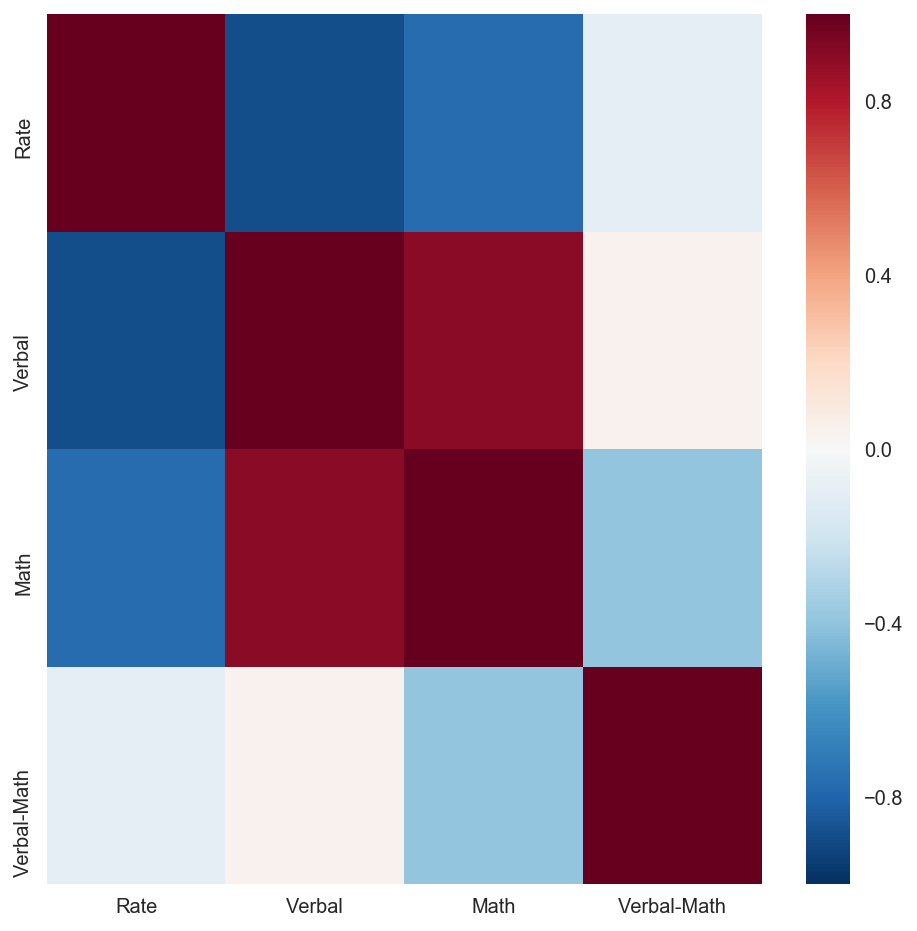

In [39]:
# Plot correlation matrix in heatmap

corr = data_pd_num.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)



<div style="width:900px;background:#F9EECF;border:1px solid black;text-align:center;padding:8px;">
<p>

<b> Observations:</b>
<br> Negative Correlations: Verbal vs Rate, Math vs Rate
<br> Positive Correlations: Math vs Verbal
<br> Little Correlations: Verbal-Math

</p>
</div>

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

<img src="https://i.imgur.com/r0JC3KU.png?1" style="float: left; margin: 15px 15px 0px 0px;">
## Solution


---


In [40]:
# Assign .describe function to numeric data

data_desc = data_pd_num.describe()

In [41]:
# Write up of each row

describe = ['Total number of dataset','Average of the dataset',
            'Dispersion of the dataset from its mean','Minimum value',
           '25th percentile','50th percentile(Median)','75th percentile','Maximum value']
data_desc['Description'] = describe
data_desc

,Rate,Verbal,Math,Verbal-Math,Description
count,51.000000,51.000000,51.000000,51.000000,Total number of dataset
mean,37.000000,532.529412,531.843137,0.686275,Average of the dataset
std,27.550681,33.360667,36.287393,15.839811,Dispersion of the dataset from its mean
min,4.000000,482.000000,439.000000,-30.000000,Minimum value
25%,9.000000,501.000000,503.000000,-6.000000,25th percentile
50%,33.000000,527.000000,525.000000,0.000000,50th percentile(Median)
75%,64.000000,562.000000,557.500000,4.500000,75th percentile
max,82.000000,593.000000,603.000000,95.000000,Maximum value


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

<img src="https://i.imgur.com/r0JC3KU.png?1" style="float: left; margin: 15px 15px 0px 0px;">
## Solution


---

<div style="width:900px;background:#F9EECF;border:1px solid black;text-align:center;padding:8px;">
<p>
<b>Describe how the covariance matrix is different from the correlation matrix.</b>
<br>The covariance is the measure of the extent to which two variables change in tandem while correlation measures how strongly the two variables are related<br>
<br><b>What is the process to convert the covariance into the correlation?</b>
<br>Correlation = Covariance / ( (std(var1) * std(var2) ) <br>
<br><b>Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?</b>
<br>Correlation matrix is preferred because it remains unaffected by the change in scale

</p>
</div>




In [42]:
# Covariance matrix

cov = data_pd_num.cov()
print cov

               Rate       Verbal         Math  Verbal-Math
Rate         759.04  -816.280000  -773.220000   -43.060000
Verbal      -816.28  1112.934118  1089.404706    23.529412
Math        -773.22  1089.404706  1316.774902  -227.370196
Verbal-Math  -43.06    23.529412  -227.370196   250.899608


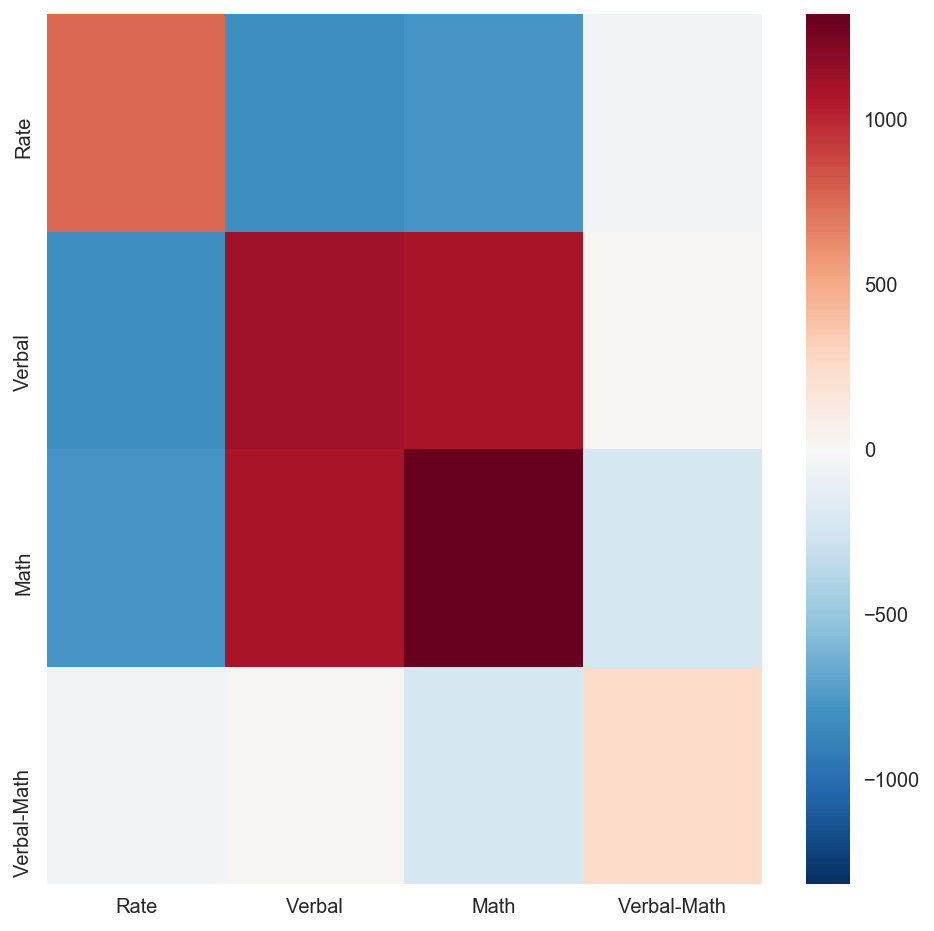

In [43]:
# Plot covariance matrix in heatmap

cov = data_pd_num.cov()
sns.heatmap(cov, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [44]:
# Normalised Covariance

cov_n = data_pd_n.cov()
print cov_n

            Rate    Verbal      Math
Rate    1.000000 -0.888121 -0.773419
Verbal -0.888121  1.000000  0.899909
Math   -0.773419  0.899909  1.000000


In [45]:
# Normalised Correlation

corr_n = data_pd_n.corr()
print corr_n

            Rate    Verbal      Math
Rate    1.000000 -0.888121 -0.773419
Verbal -0.888121  1.000000  0.899909
Math   -0.773419  0.899909  1.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

<img src="https://i.imgur.com/r0JC3KU.png?1" style="float: left; margin: 15px 15px 0px 0px;">
## Solution


---


In [46]:
# Check data type
drug_data = pd.read_csv('drug-use-by-age.csv')
print drug_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

<div style="width:900px;background:#F9EECF;border:1px solid black;text-align:center;padding:8px;">
<p>
There are some variables which are supposed to be numeric.
</p>
</div>

In [47]:
# Check data type - find out why

drug_data.head(5)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


# Step 1: Codebook

<br><div style="width:900px;background:#F9EECF;border:1px solid black;text-align:center;padding:8px;">
<p>

Understanding each features:
<br><br> <b>age:</b> Age group
<br> <b>n:</b> Number of samples per age group
<br><br> <b>*Other than age and n, all other features must be a float:</b>
</p>

</div>



<table align="left">
<thead>
<tr>
<th>Header</th>
<th>Definition</th>
</tr>
</thead>
<tbody>
<tr>
<td><code>alcohol-use</code></td>
<td>Percentage of those in an age group who used alcohol in the past 12 months</td>
</tr>
<tr>
<td><code>alcohol-frequency</code></td>
<td>Median number of times a user in an age group used alcohol in the past 12 months</td>
</tr>
<tr>
<td><code>marijuana-use</code></td>
<td>Percentage of those in an age group who used marijuana in the past 12 months</td>
</tr>
<tr>
<td><code>marijuana-frequency</code></td>
<td>Median number of times a user in an age group used marijuana in the past 12 months</td>
</tr>
<tr>
<td><code>cocaine-use</code></td>
<td>Percentage of those in an age group who used cocaine in the past 12 months</td>
</tr>
<tr>
<td><code>cocaine-frequency</code></td>
<td>Median number of times a user in an age group used cocaine in the past 12 months</td>
</tr>
<tr>
<td><code>crack-use</code></td>
<td>Percentage of those in an age group who used crack in the past 12 months</td>
</tr>
<tr>
<td><code>crack-frequency</code></td>
<td>Median number of times a user in an age group used crack in the past 12 months</td>
</tr>
<tr>
<td><code>heroin-use</code></td>
<td>Percentage of those in an age group who used heroin in the past 12 months</td>
</tr>
<tr>
<td><code>heroin-frequency</code></td>
<td>Median number of times a user in an age group used heroin in the past 12 months</td>
</tr>
<tr>
<td><code>hallucinogen-use</code></td>
<td>Percentage of those in an age group who used hallucinogens in the past 12 months</td>
</tr>
<tr>
<td><code>hallucinogen-frequency</code></td>
<td>Median number of times a user in an age group used hallucinogens in the past 12 months</td>
</tr>
<tr>
<td><code>inhalant-use</code></td>
<td>Percentage of those in an age group who used inhalants in the past 12 months</td>
</tr>
<tr>
<td><code>inhalant-frequency</code></td>
<td>Median number of times a user in an age group used inhalants in the past 12 months</td>
</tr>
<tr>
<td><code>pain-releiver-use</code></td>
<td>Percentage of those in an age group who used pain relievers in the past 12 months</td>
</tr>
<tr>
<td><code>pain-releiver-frequency</code></td>
<td>Median number of times a user in an age group used pain relievers in the past 12 months</td>
</tr>
<tr>
<td><code>oxycontin-use</code></td>
<td>Percentage of those in an age group who used oxycontin in the past 12 months</td>
</tr>
<tr>
<td><code>oxycontin-frequency</code></td>
<td>Median number of times a user in an age group used oxycontin in the past 12 months</td>
</tr>
<tr>
<td><code>tranquilizer-use</code></td>
<td>Percentage of those in an age group who used tranquilizer in the past 12 months</td>
</tr>
<tr>
<td><code>tranquilizer-frequency</code></td>
<td>Median number of times a user in an age group used tranquilizer in the past 12 months</td>
</tr>
<tr>
<td><code>stimulant-use</code></td>
<td>Percentage of those in an age group who used stimulants in the past 12 months</td>
</tr>
<tr>
<td><code>stimulant-frequency</code></td>
<td>Median number of times a user in an age group used stimulants in the past 12 months</td>
</tr>
<tr>
<td><code>meth-use</code></td>
<td>Percentage of those in an age group who used meth in the past 12 months</td>
</tr>
<tr>
<td><code>meth-frequency</code></td>
<td>Median number of times a user in an age group used meth in the past 12 months</td>
</tr>
<tr>
<td><code>sedative-use</code></td>
<td>Percentage of those in an age group who used sedatives in the past 12 months</td>
</tr>
<tr>
<td><code>sedative-frequency</code></td>
<td>Median number of times a user in an age group used sedatives in the past 12 months</td>
</tr></tbody></table>

# Step 2: Ensure all data are of rightful data type

In [48]:
# Data slice - variables only

var_list = list(drug_data.columns[2:])

In [49]:
# Check number of NaN/'string' values
# Melt table into long table

drug_long = pd.melt(drug_data,id_vars=['age','n'],value_vars=var_list,var_name='variable', value_name='value')

# Identify non-numeric values

drug_long.value.unique()
drug_long[drug_long.value == '-']

,age,n,variable,value
101,65+,2448,cocaine-frequency,-
119,12,2798,crack-frequency,-
121,14,2792,crack-frequency,-
135,65+,2448,crack-frequency,-
154,13,2757,heroin-frequency,-
237,65+,2448,inhalant-frequency,-
305,65+,2448,oxycontin-frequency,-
391,12,2798,meth-frequency,-
407,65+,2448,meth-frequency,-


<div style="width:900px;background:#F9EECF;border:1px solid black;text-align:center;padding:8px;">
<p>

<b> Reason for ' - ' is because the drug-use == 0.
<br> Hence, it is safe to convert all ' - ' into zeros

</p>

</div>



In [50]:
# Replace all '-' with 0.0

drug_long.loc[(drug_long.value == '-'),'value'] = float(0.0)


In [51]:
# Convert value column into float

drug_long.value = drug_long.value.astype(float)

In [52]:
# Check data type
drug_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 4 columns):
age         442 non-null object
n           442 non-null int64
variable    442 non-null object
value       442 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 13.9+ KB


In [53]:
# Pivot back to wide table

drug_wide = pd.pivot_table(drug_long,index=['age','n'],columns=['variable'],values='value')
drug_wide.reset_index(inplace=True)

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

# Step 3: Visualisation

## DRUG FREQUENCY

<div style="width:900px;background:#F9EECF;border:1px solid black;text-align:center;padding:8px;">
<p>
<b> CORRELATIONS
</p>

</div>

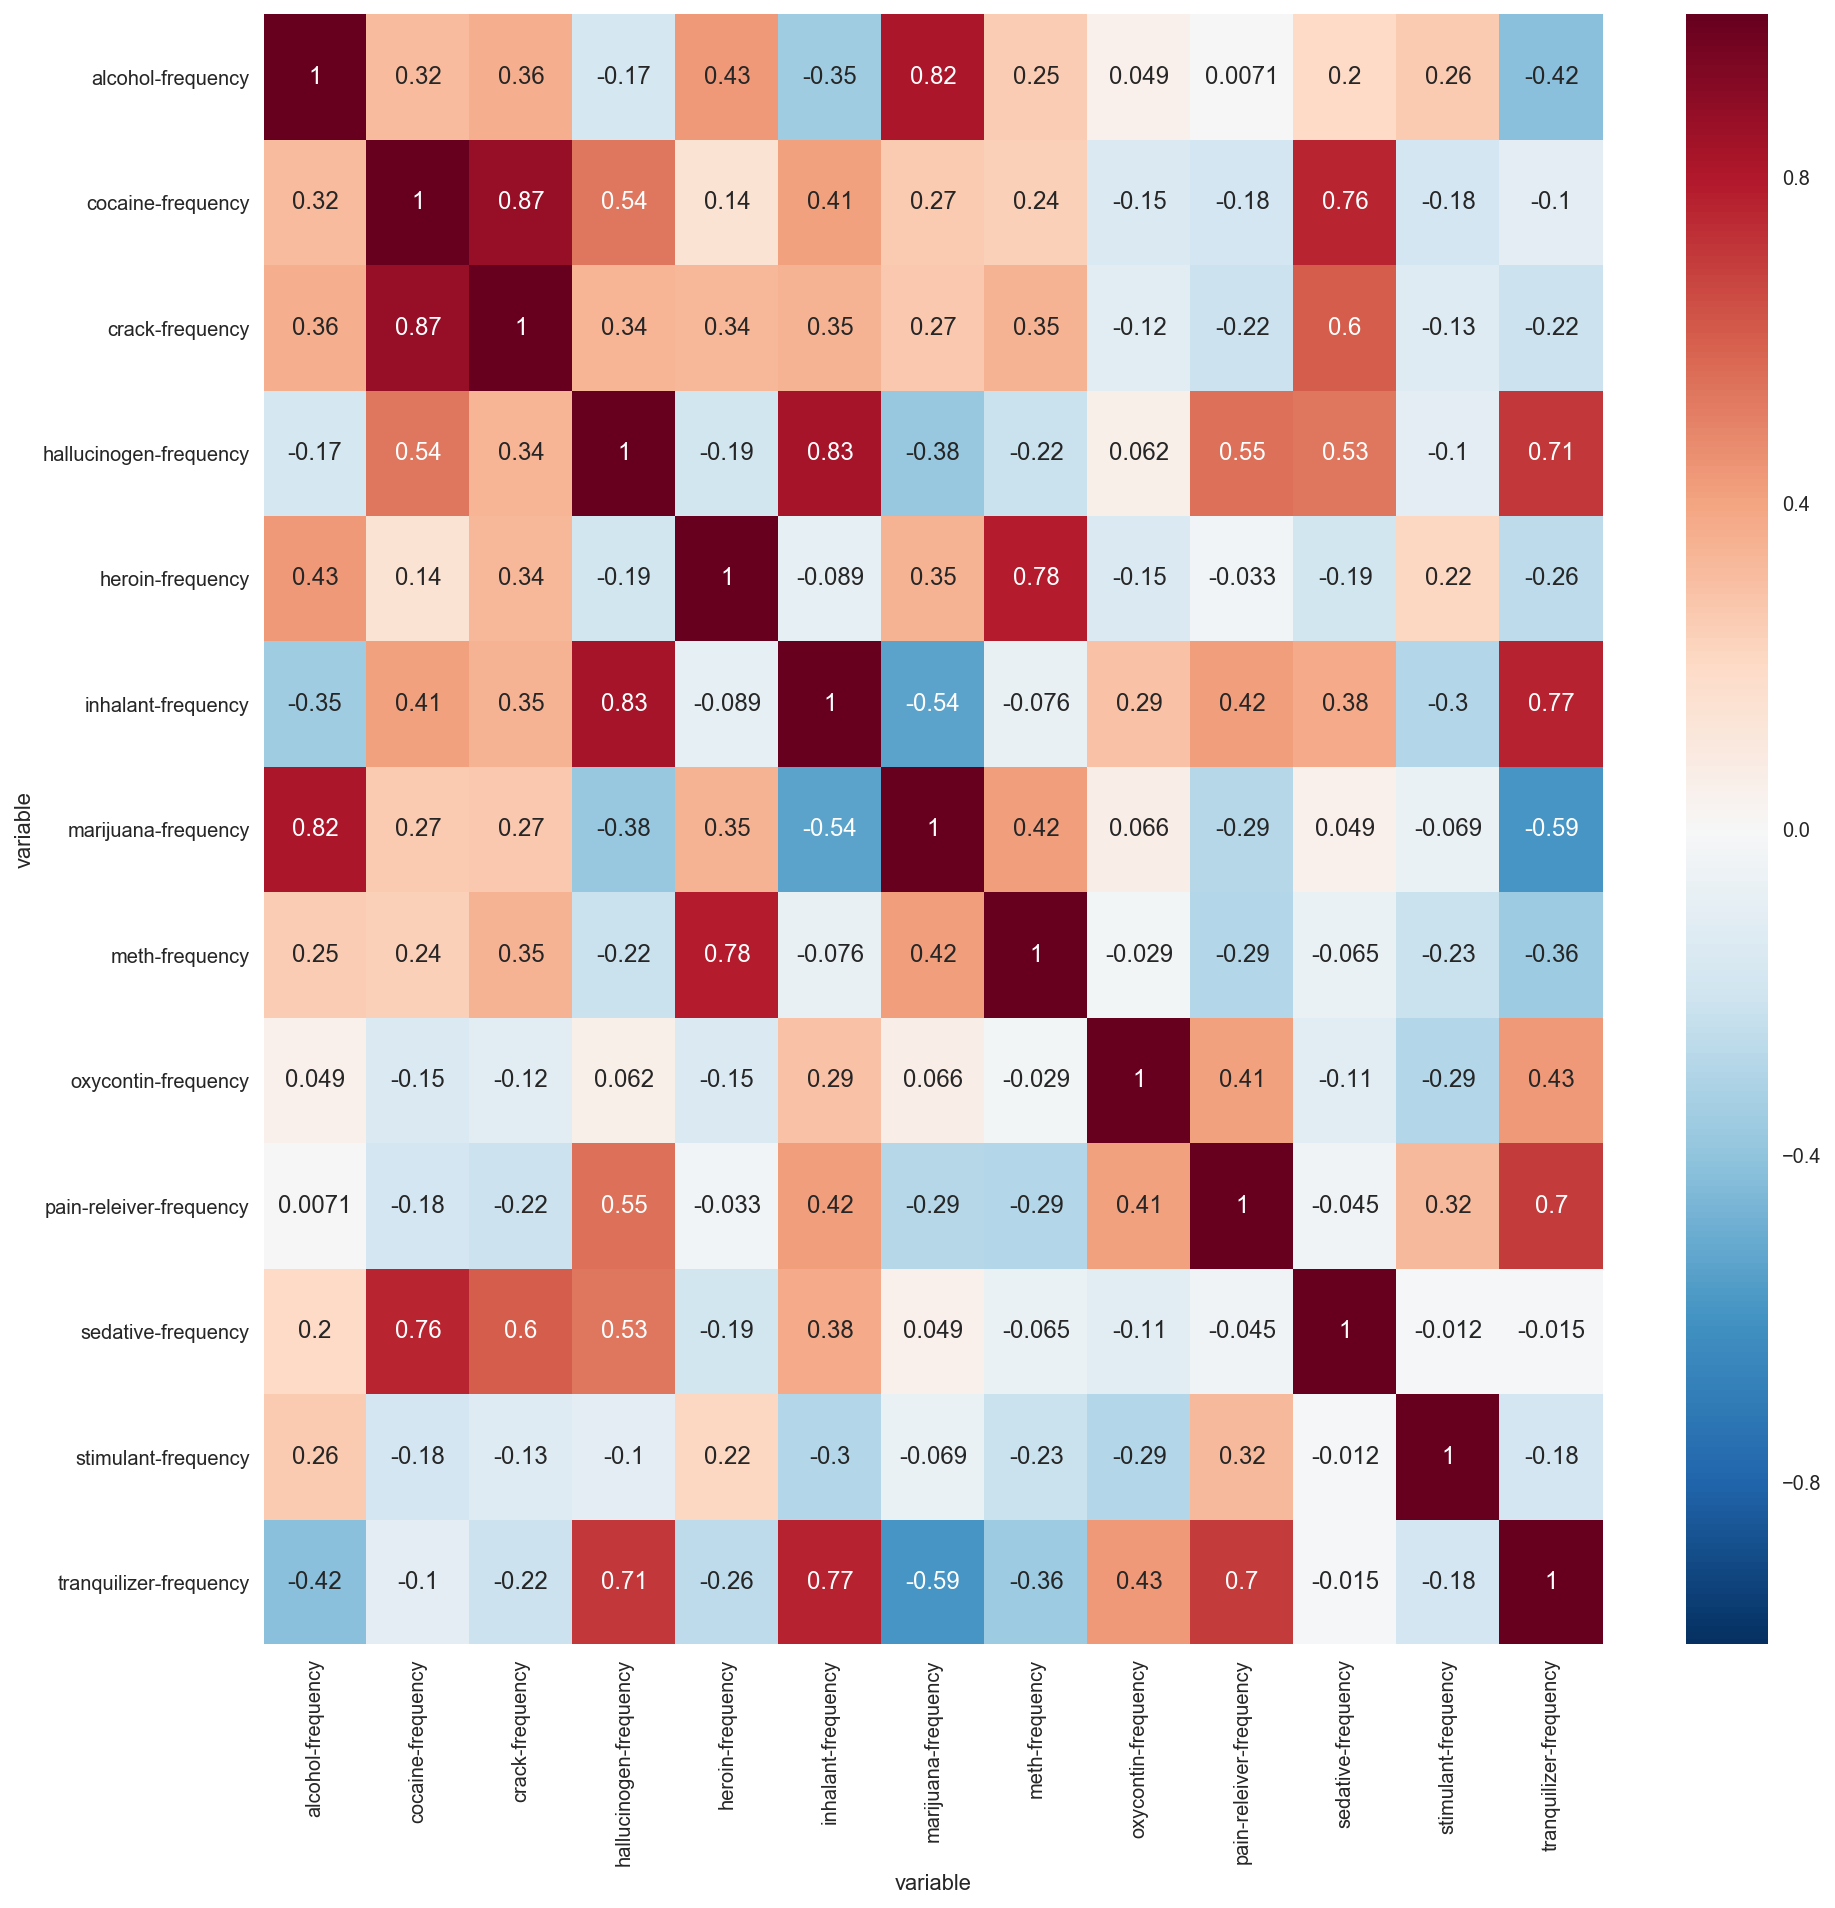

In [95]:
# Find correlationship between drug frequencies

columns = [column for column in drug_wide.columns if 'frequency' in column]
drug_freq = drug_wide[columns]

# Plot correlation matrix in heatmap

sns.set(rc={"figure.figsize": (15, 15)})
corr = drug_freq.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)

In [55]:
# Data slicing

drug_freq_l = list(drug_wide.columns)[:1]
drug_freq_l.extend(list(drug_wide.columns)[2::2])
drug_freq_n = drug_wide[drug_freq_l]

In [56]:
# Set 'age' as index

drug_freq_n.set_index('age',inplace=True)

<div style="width:900px;background:#F9EECF;border:1px solid black;text-align:center;padding:8px;">
<p>
<b>Group all median from 12 to 21 years old (Median of the Medians)</b>
</p>

</div>

In [57]:
new_row = []
for x in range(drug_freq_n.shape[1]):
    
    new_row.append(drug_freq_n.iloc[:10,x].median())


In [58]:
df = pd.DataFrame([new_row],columns=drug_freq_n.columns,index=['12-21'])
drug_small = drug_freq_n.append(df)

In [59]:
drug_small = drug_small.iloc[10:,:]

In [60]:
drug_small.sort_index(inplace=True)

<div style="width:900px;background:#F9EECF;border:1px solid black;text-align:center;padding:8px;">
<p>
<b> SWARMPLOT - Outliers?
</p>

</div>

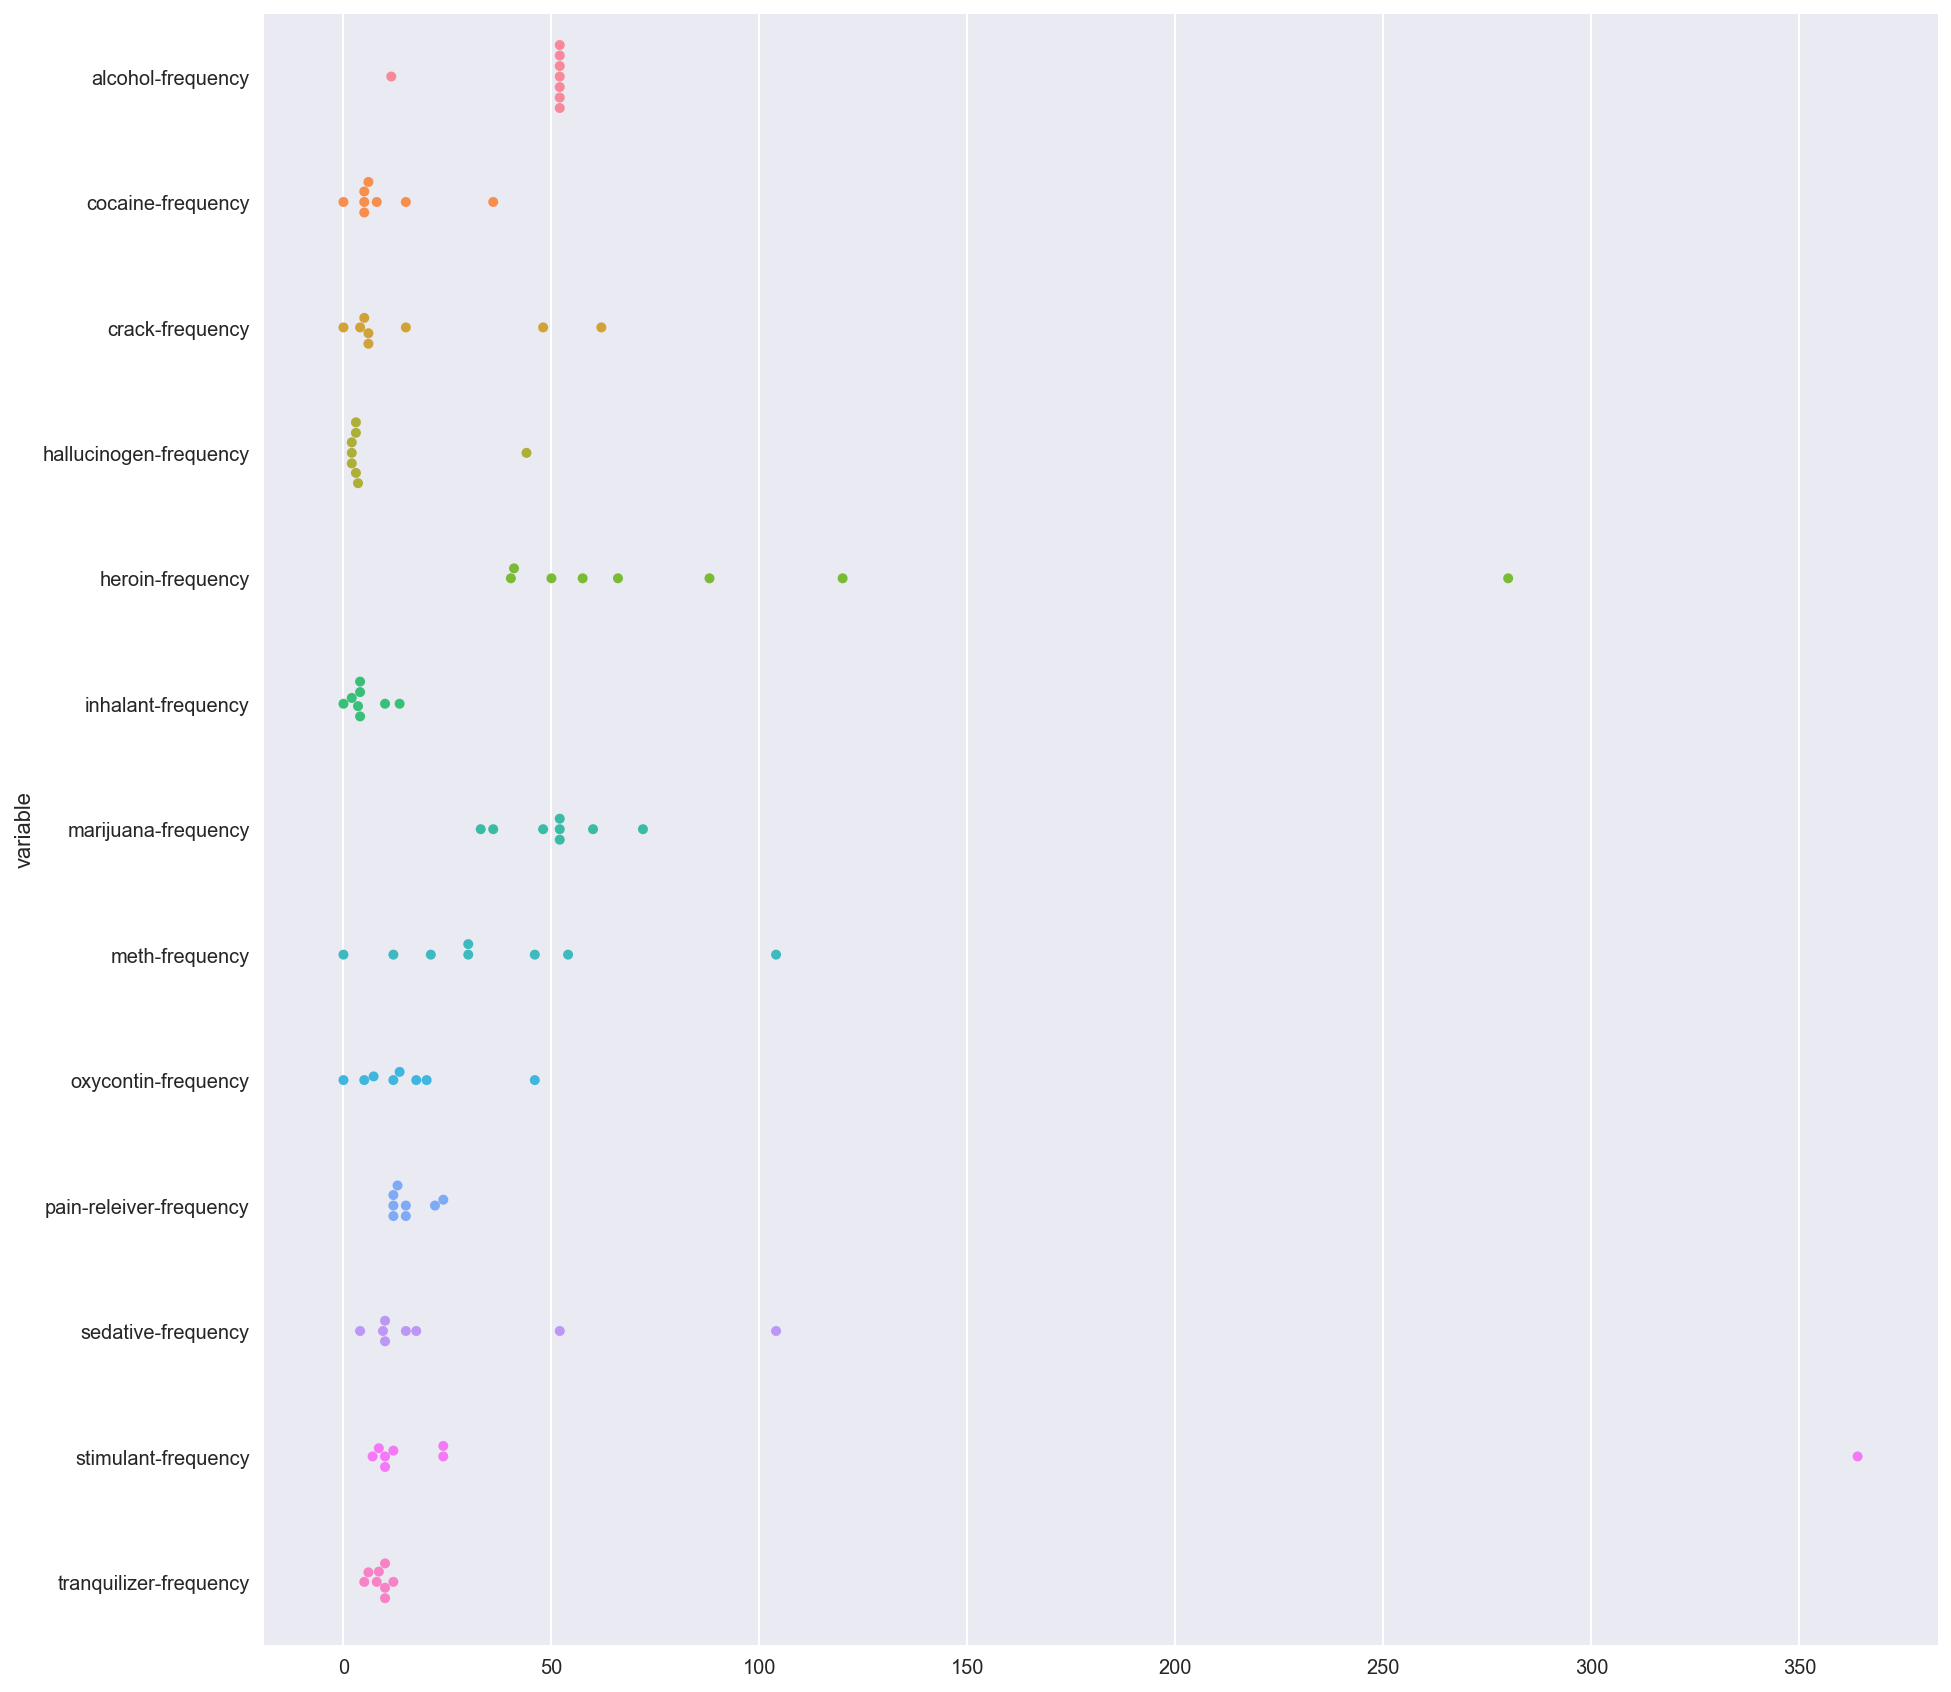

In [61]:
#Identify the outliers

sns.swarmplot(data=drug_small, orient='h')

<div style="width:900px;background:#F9EECF;border:1px solid black;text-align:center;padding:8px;">
<p>
There are a few extreme outliers - find out which age-group do they belong to.
</p>

</div>

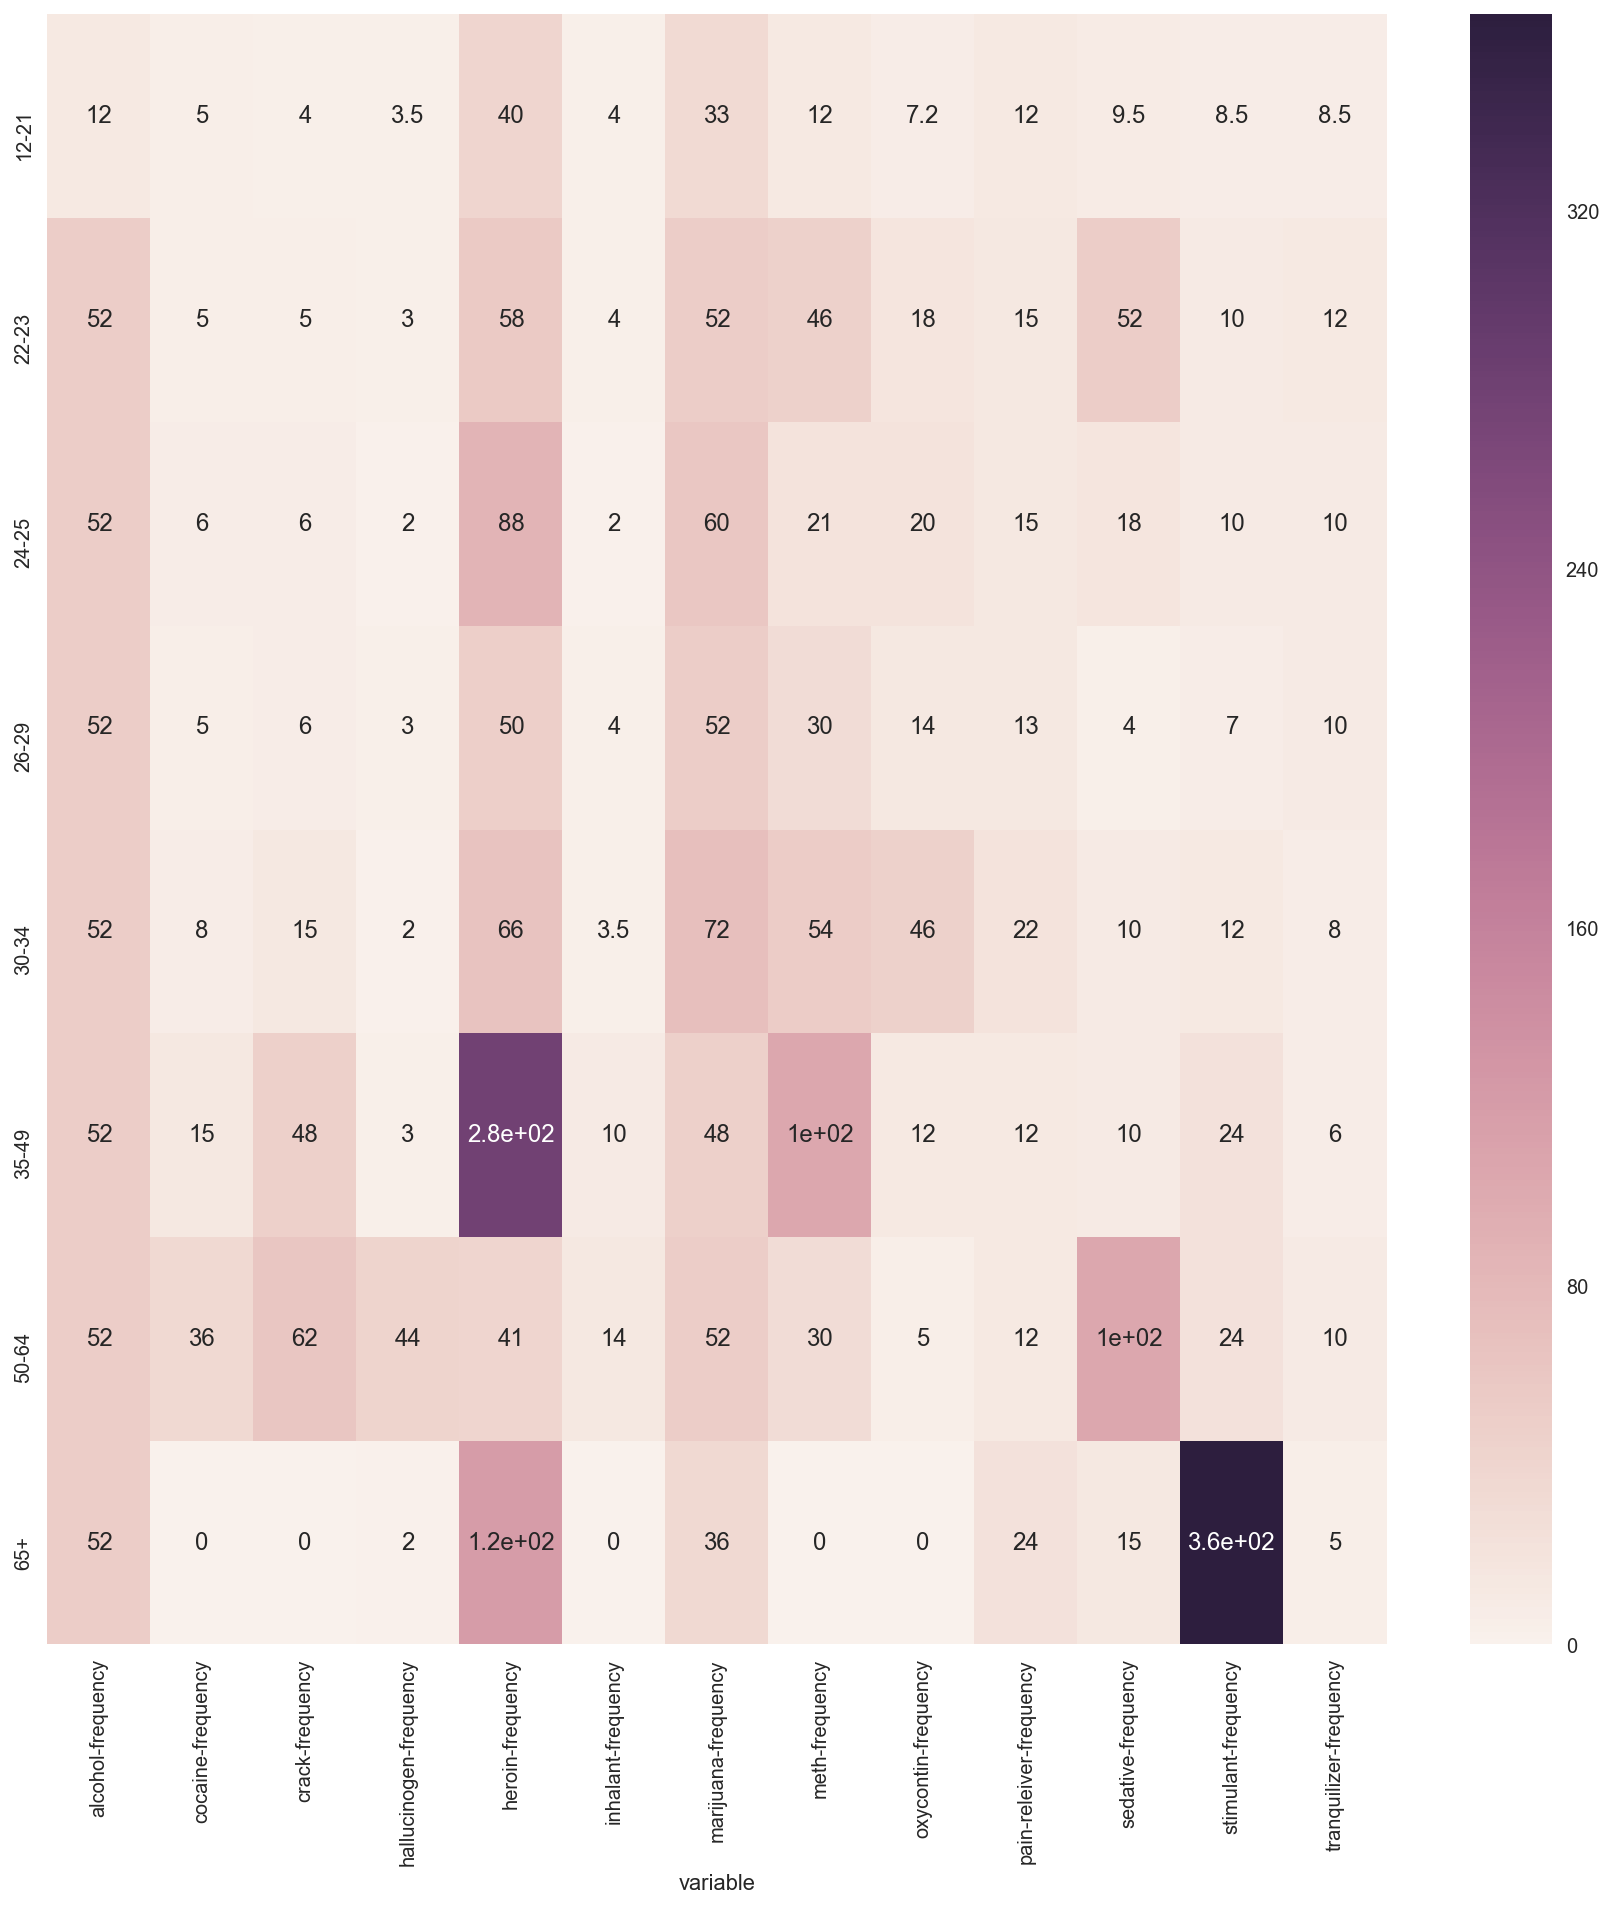

In [62]:
# Plot heatmap

sns.heatmap(drug_small,annot=True)

<div style="width:900px;background:#F9EECF;border:1px solid black;text-align:center;padding:8px;">
<p>
Areas of concern - the boxes with darker colours!
</p>

</div>

# DRUG USE

<div style="width:900px;background:#F9EECF;border:1px solid black;text-align:center;padding:8px;">
<p>
<b> CORRELATIONS
</p>

</div>

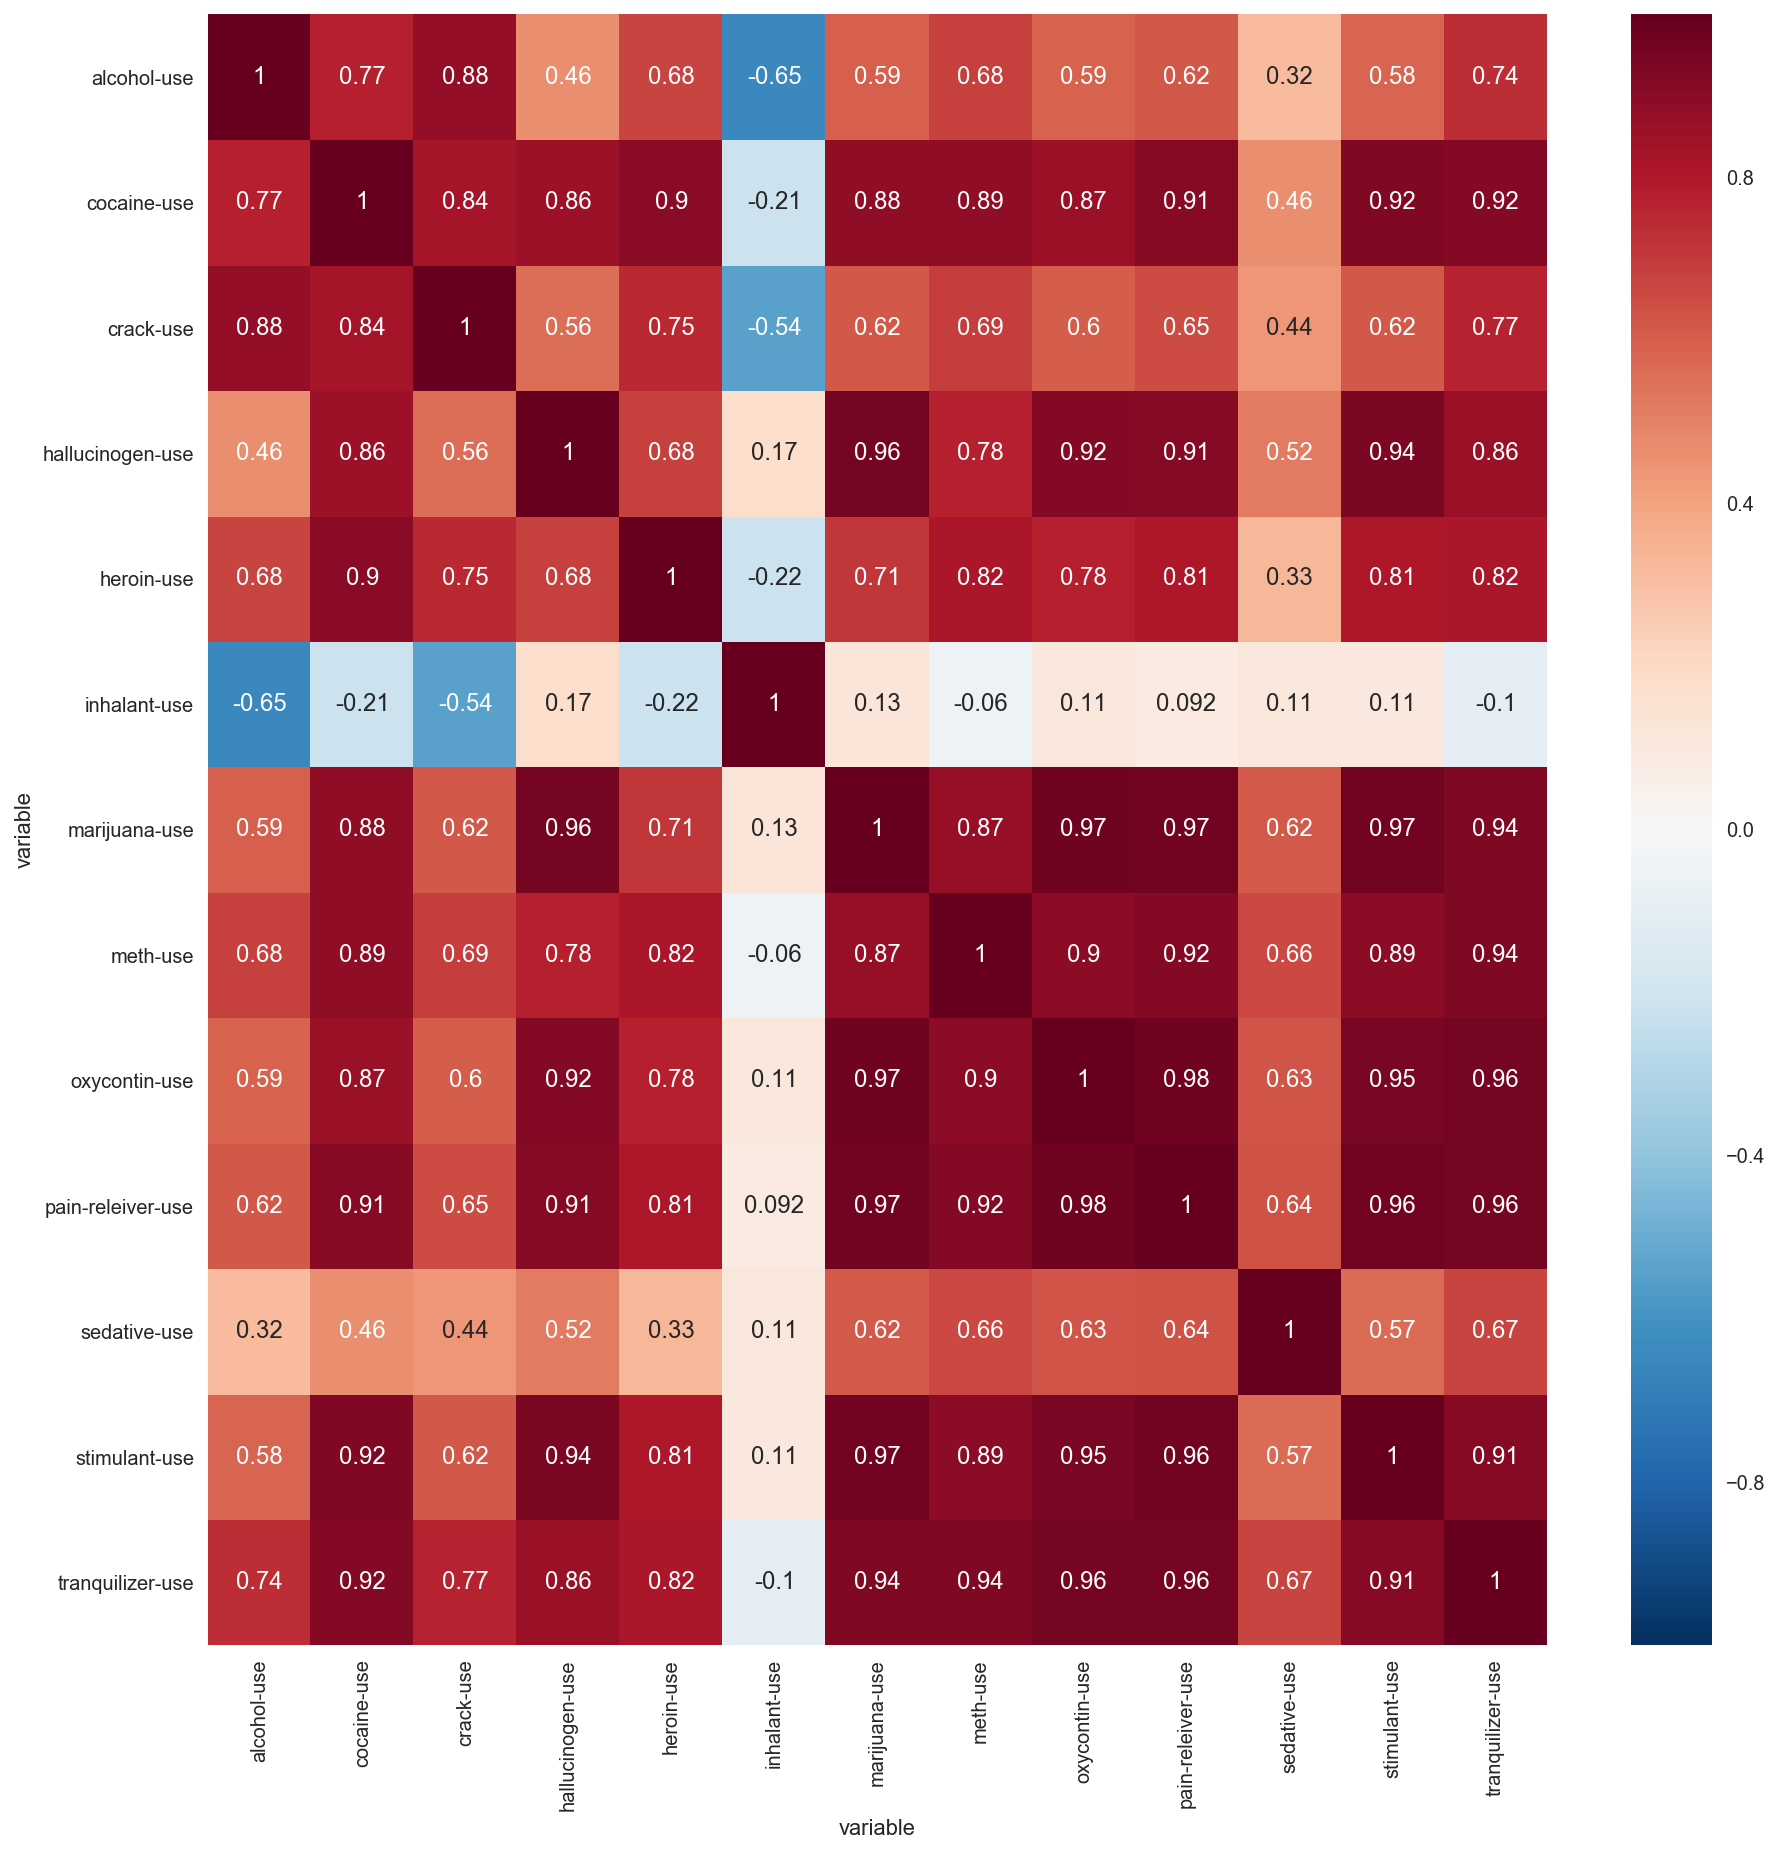

In [96]:
# Find correlationship between drug uses

columns = [column for column in drug_wide.columns if 'use' in column]
drug_use = drug_wide[columns]

# Plot correlation matrix in heatmap

sns.set(rc={"figure.figsize": (15, 15)})
corr = drug_use.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)


In [64]:
# Data slicing

drug_use_l = list(drug_wide.columns)[:2]
drug_use_l.extend(list(drug_wide.columns)[3::2])
drug_use_n = drug_wide[drug_use_l]

In [65]:
# Set 'Age' as index

drug_use_n.set_index('age',inplace=True)

<div style="width:900px;background:#F9EECF;border:1px solid black;text-align:center;padding:8px;">
<p>
<b>Group all percentages from 12 to 21 years old </b>
<br>
 (( value /100 * n ) / total(n) ) * 100


</p>

</div>

In [66]:
# total(n)
drug_use_n.iloc[:10,0].sum()

26716L

In [67]:
# Define a function to calculate new percentage for the group

def func(val):
    for x in range(drug_use_n.shape[0]):
        mul = (val/100)*drug_use_n.iloc[x,0]
        
        return mul

In [68]:
# Apply function

table = drug_use_n.iloc[:10,1:].apply(func)

In [69]:
new_row2 = (table.sum(axis=0)/26716)*100

In [70]:
# Create new dataframe with new information

df2 = pd.DataFrame([new_row2],columns=drug_use_n.columns,index=['12-21'])
druguse_small = drug_use_n.append(df2)

In [71]:
druguse_small = druguse_small.iloc[10:,:]

In [72]:
druguse_small.sort_index(inplace=True)

In [73]:
druguse_small.iloc[0,0] = drug_use_n.iloc[:10,0].sum()

<div style="width:900px;background:#F9EECF;border:1px solid black;text-align:center;padding:8px;">
<p>
<b> SWARMPLOT - Outliers?
</p>

</div>

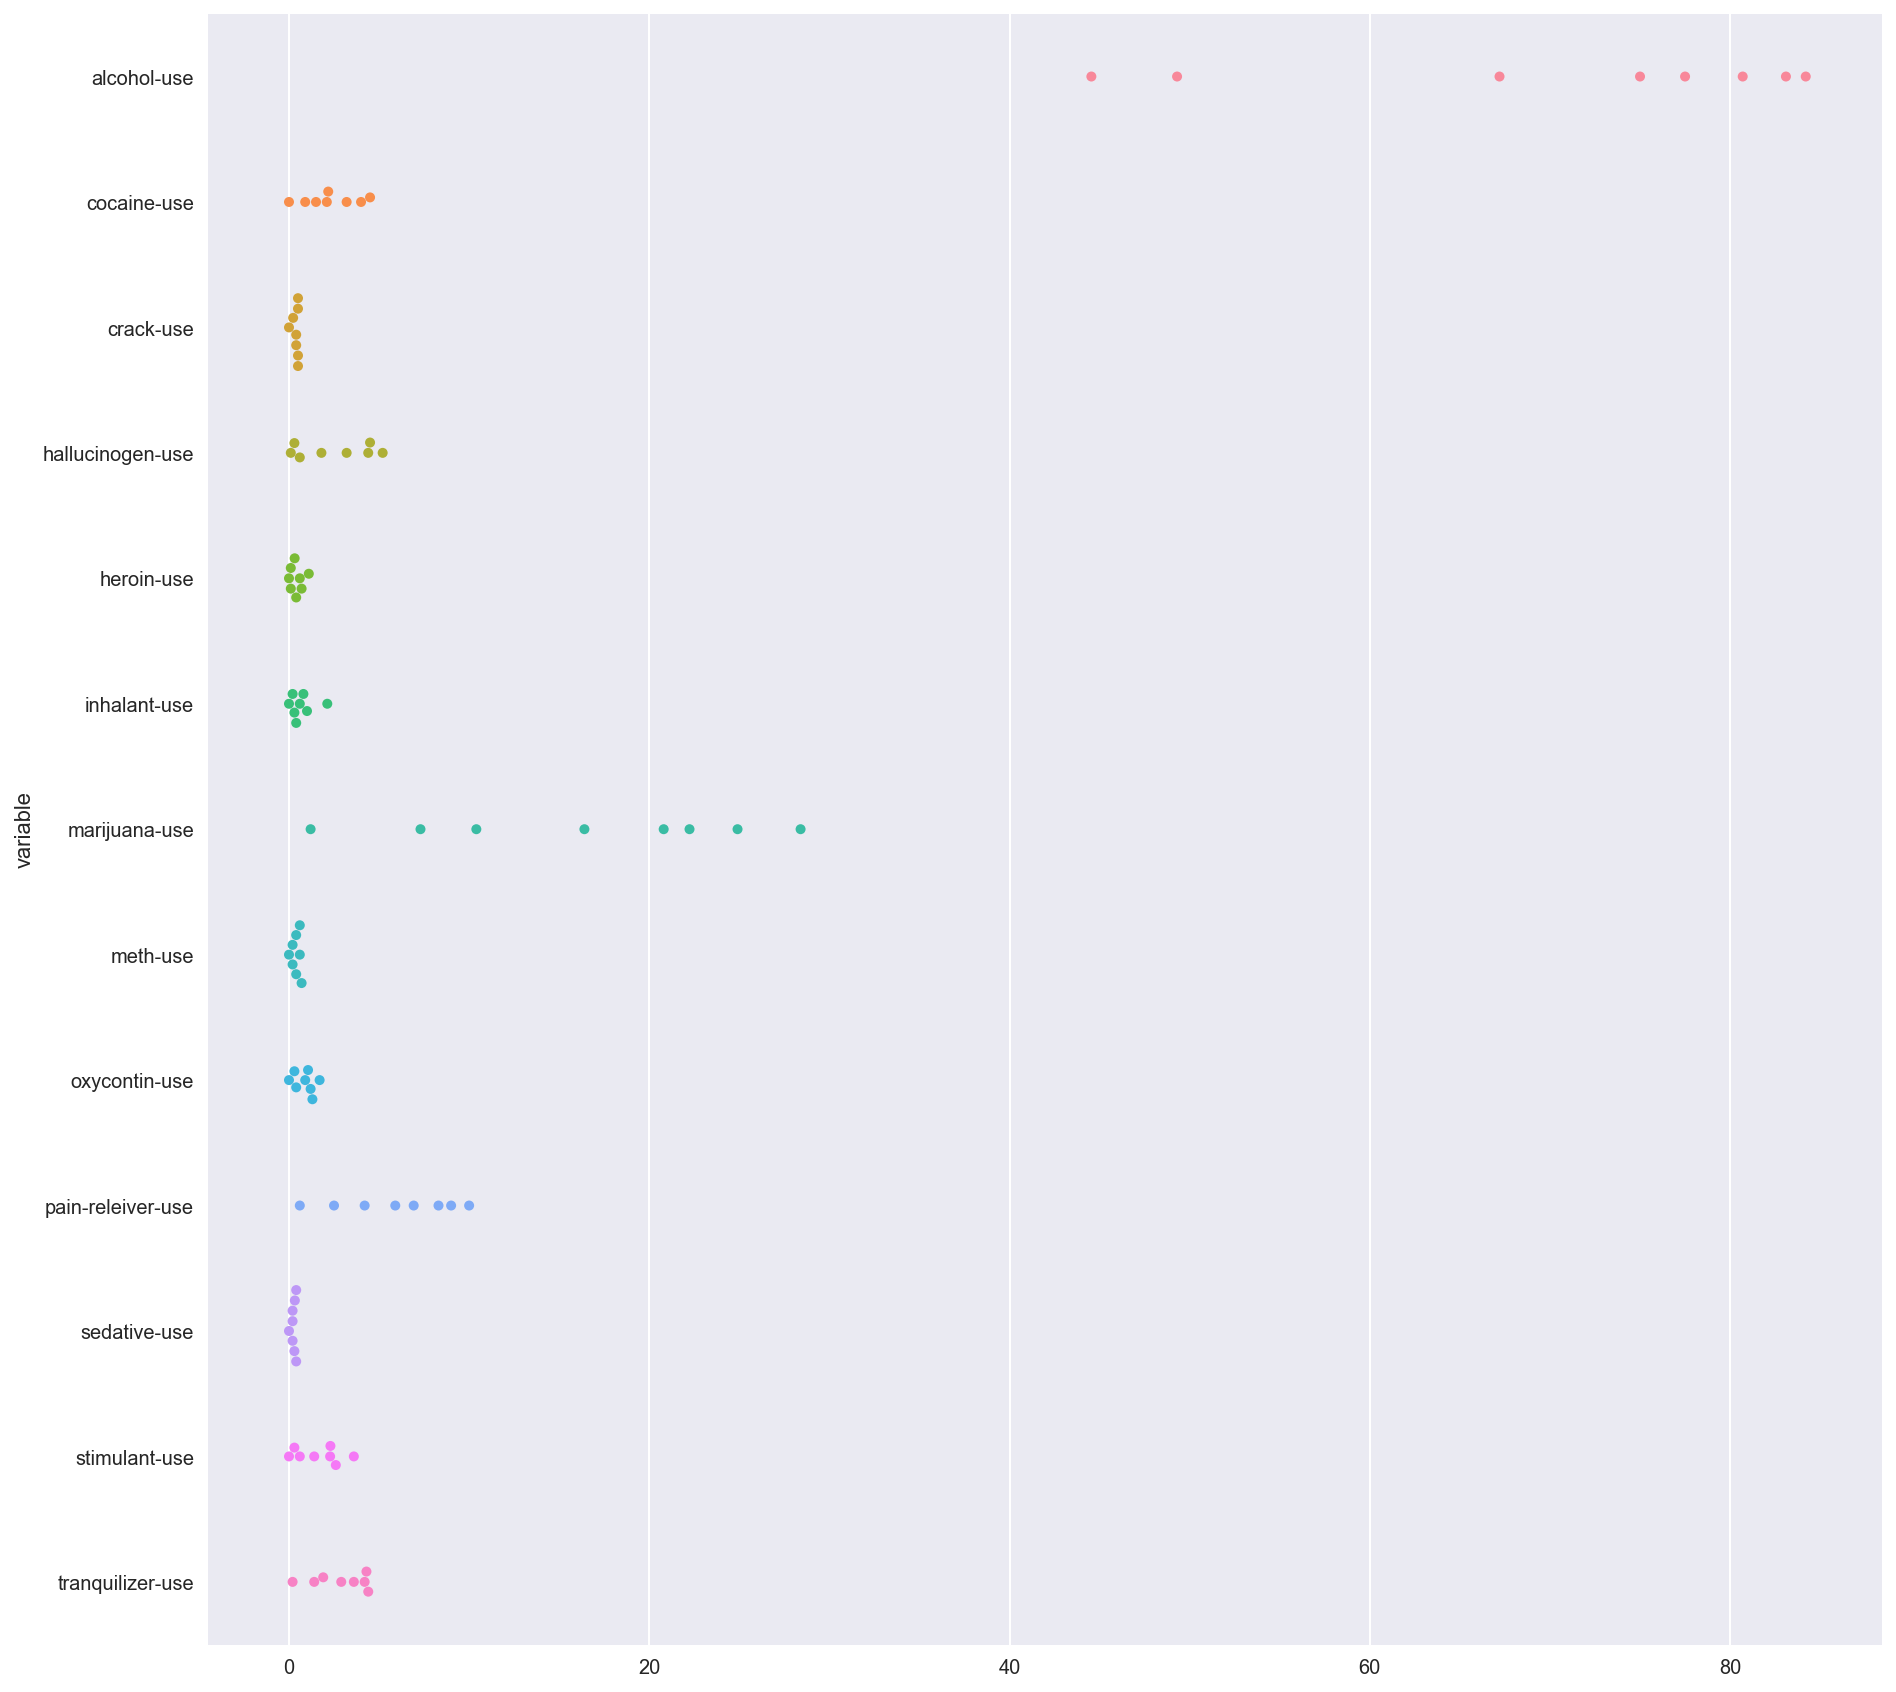

In [74]:
# Identify the outliers

sns.swarmplot(data=druguse_small.iloc[:,1:],orient='h')

<div style="width:900px;background:#F9EECF;border:1px solid black;text-align:center;padding:8px;">
<p>
There are a few extreme outliers - find out which age-group do they belong to.
</p>

</div>

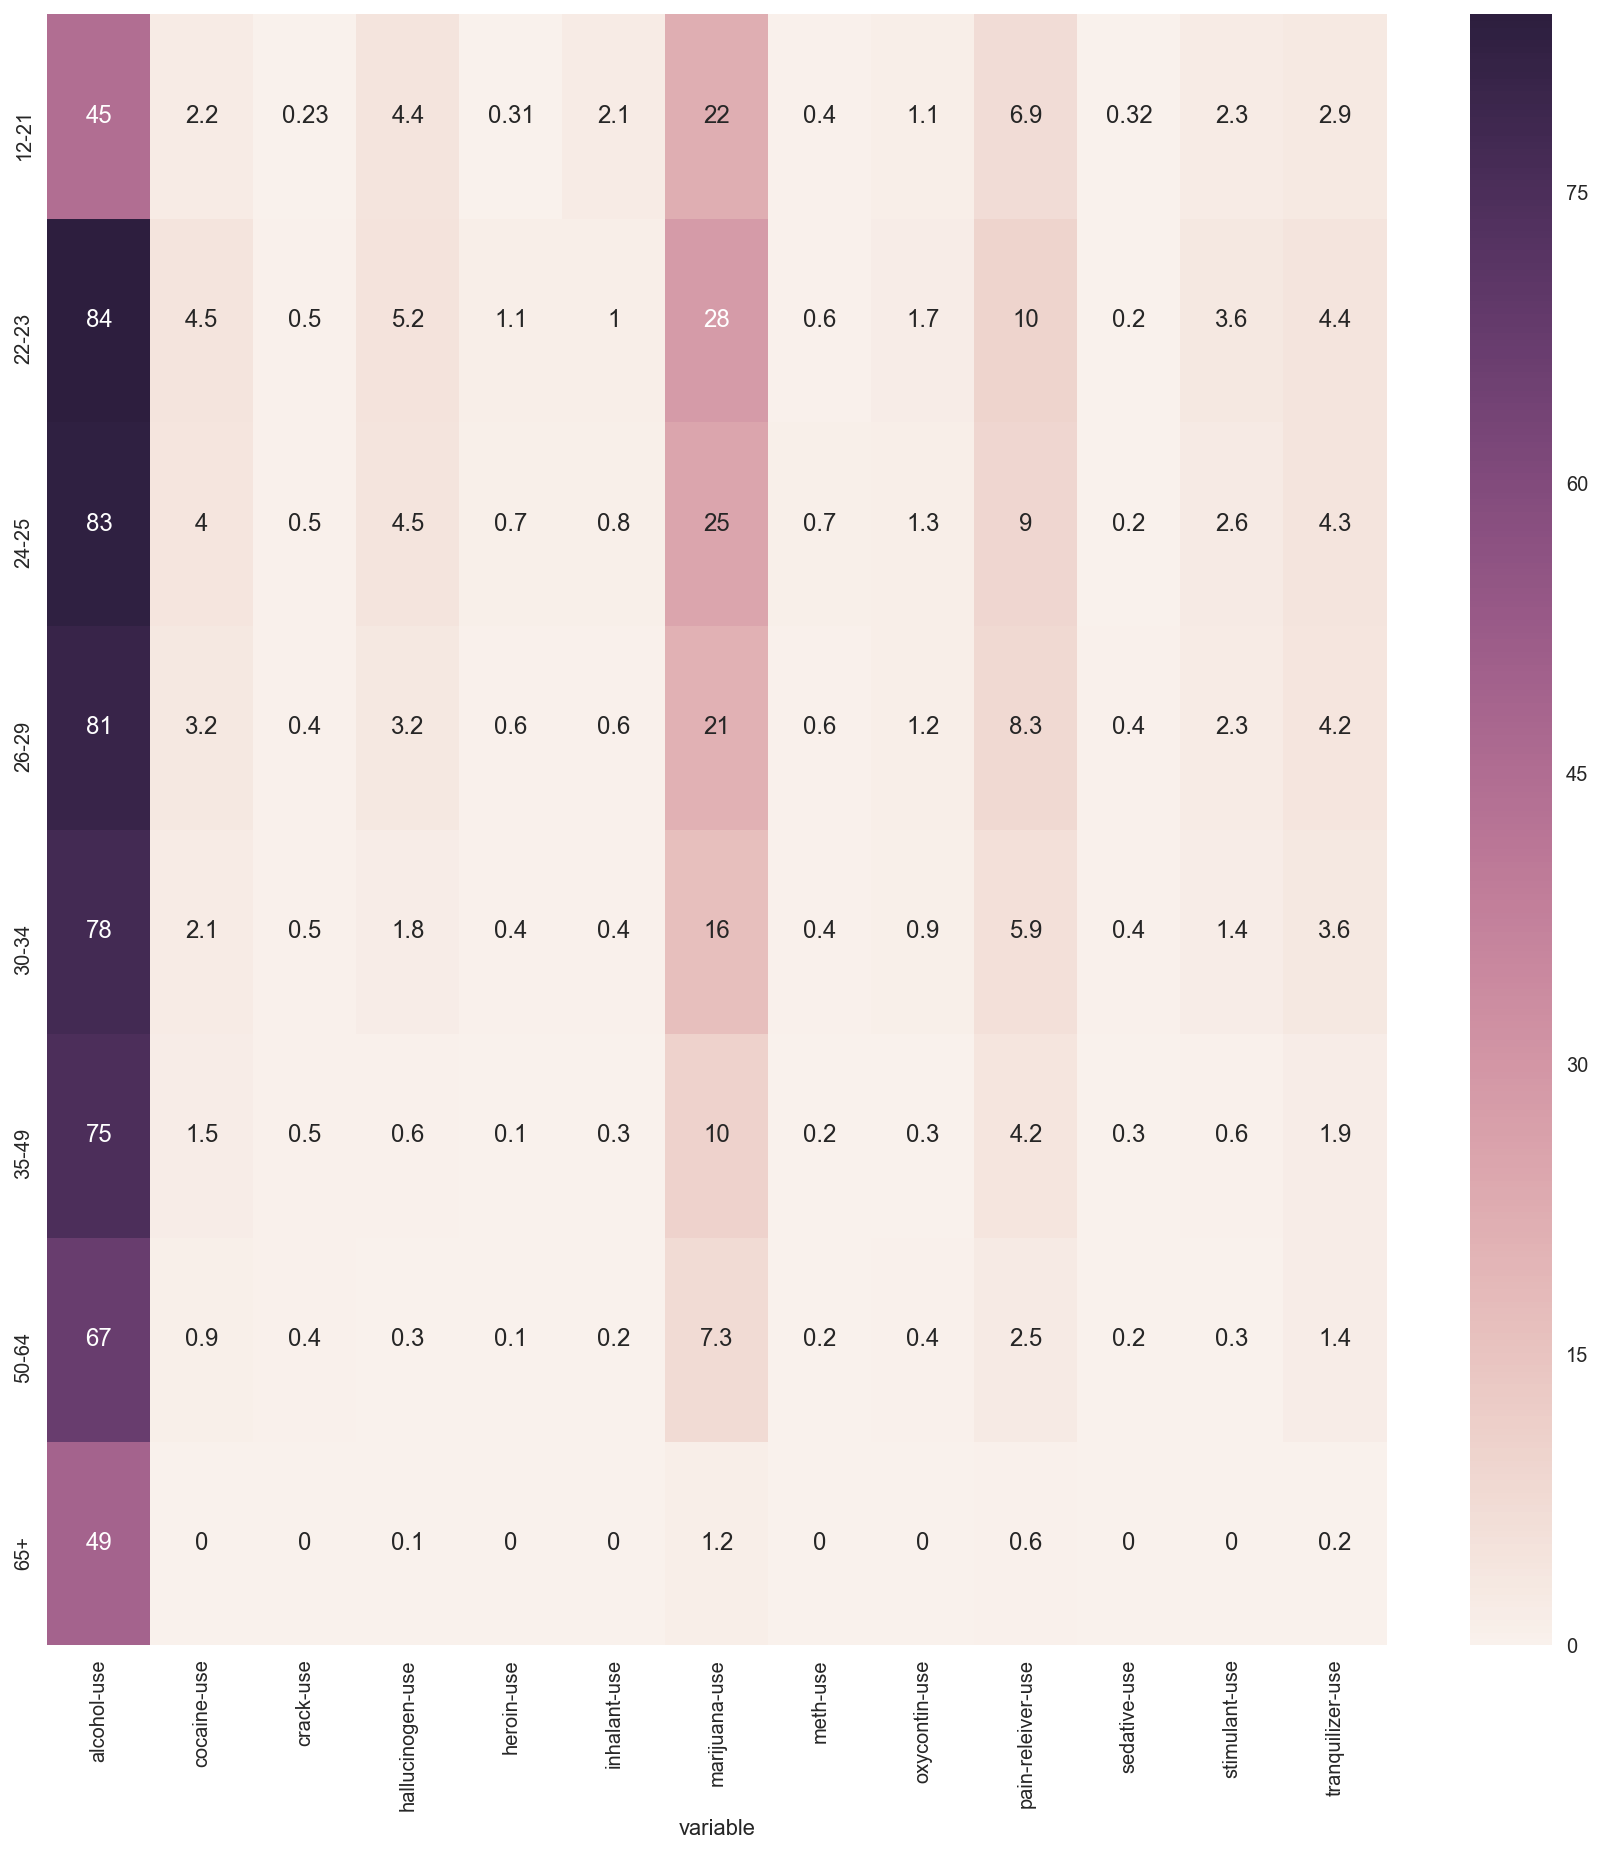

In [75]:
sns.heatmap(druguse_small.iloc[:,1:],annot=True)

<div style="width:900px;background:#F9EECF;border:1px solid black;text-align:center;padding:8px;">
<p>
Areas of concern - the boxes with darker colours!
</p>

</div>

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

In [99]:
drug_small

variable,alcohol-frequency,cocaine-frequency,crack-frequency,hallucinogen-frequency,heroin-frequency,inhalant-frequency,marijuana-frequency,meth-frequency,oxycontin-frequency,pain-releiver-frequency,sedative-frequency,stimulant-frequency,tranquilizer-frequency
12-21,11.5,5.0,4.0,3.5,40.25,4.0,33.0,12.0,7.25,12.0,9.5,8.5,8.5
22-23,52.0,5.0,5.0,3.0,57.50,4.0,52.0,46.0,17.50,15.0,52.0,10.0,12.0
24-25,52.0,6.0,6.0,2.0,88.00,2.0,60.0,21.0,20.00,15.0,17.5,10.0,10.0
26-29,52.0,5.0,6.0,3.0,50.00,4.0,52.0,30.0,13.50,13.0,4.0,7.0,10.0
30-34,52.0,8.0,15.0,2.0,66.00,3.5,72.0,54.0,46.00,22.0,10.0,12.0,8.0
35-49,52.0,15.0,48.0,3.0,280.00,10.0,48.0,104.0,12.00,12.0,10.0,24.0,6.0
50-64,52.0,36.0,62.0,44.0,41.00,13.5,52.0,30.0,5.00,12.0,104.0,24.0,10.0
65+,52.0,0.0,0.0,2.0,120.00,0.0,36.0,0.0,0.00,24.0,15.0,364.0,5.0


<div style="width:900px;background:#F9EECF;border:1px solid black;text-align:center;padding:8px;">
<p>
<b>Question:</b> Marijuanana vs Heroin Usage Frequency
<br><br>
<b>Deliverables:</b> Top 3 type of drug abuse & Top 4 at-risk age-group for targetted drug abuse policies
<br><br>
<b>Null Hypothesis: </b>Difference Between Median of the distribution of Marijuanna Drug Frequency Usage and Median of the distribution of Heroin Drug Frequency Usage = 0
<br><br>
<b>Alt Hypothesis: </b>Difference Between Median of the distribution of Marijuanna Drug Frequency Usage and Median of the distribution of Heroin Drug Frequency Usage not = 0
</p>

</div>

In [183]:
# Code

# Median
median_mar = drug_small.iloc[:,6].median()
median_her = drug_small.iloc[:,4].median()

# Data points
mar = drug_small.iloc[:,6]
her = drug_small.iloc[:,4]

# Measured Difference
diff_median = median_mar - median_her

import scipy.stats as stats
stats.ttest_ind(mar, her)

Ttest_indResult(statistic=-1.4709911075509192, pvalue=0.16341096194896473)

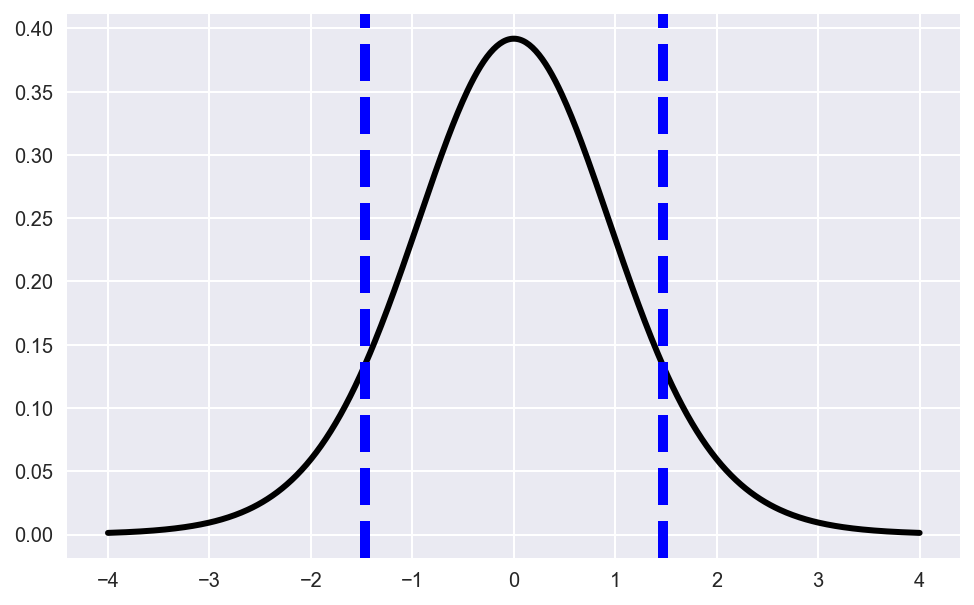

In [184]:
t_stat = (stats.ttest_ind(her, mar))[0]

# generate points on the x axis between -4 and 4:
xpoints = np.linspace(-4, 4, 500)

# use stats.t.pdf to get values on the probability density function for the t-distribution
# the second argument is the degrees of freedom: n1 + n2 - 2
ypoints = stats.t.pdf(xpoints, (8+8-2), 0, 1)

# initialize a matplotlib "figure"
fig = plt.figure(figsize=(8,5))

# get the current "axis" out of the figure
ax = fig.gca()

# plot the lines using matplotlib's plot function:
ax.plot(xpoints, ypoints, linewidth=3, color='black')

# plot a vertical line for our measured difference in rates t-statistic
ax.axvline(t_stat, color='blue', linestyle='--', lw=5)
ax.axvline(-t_stat, color='blue', linestyle='--', lw=5)

<div style="width:900px;background:#F9EECF;border:1px solid black;text-align:center;padding:8px;">
<p>
At 5% significance level, the null hypothesis is not rejected as p-value 0.16 > 0.05.
</p>

</div>

<div style="width:900px;background:#F9EECF;border:1px solid black;text-align:center;padding:8px;">
<p>
**REPORT**
<br><br>
<b>TOP 3 TYPE OF DRUG ABUSE</b>
<br><br>
1. Marijuana
<br>2. Heroin
<br>3. Alcohol
<br><br>
Based on the hypothesis test, we do not have enough evidence to conclude that median of the distribution of either drugs is higher than the other.
<br><br>
However, based on fig on % drug use, there is a higher precentage per age group that uses marijuana. Thus, Marijuana is the top drug abused.
<br><br>
Alcohol made it to the chart because it has the highest percentage of usage in every age group. 
<br><br> 
<b>AGE-GROUP AT RISK:</b>
<br><br>
12 - 21
<br>35 - 49 (heroin & meth)
<br>50 - 64 (Sedative)
<br>65+ (heroin & stimulant)<br>
<br> (See drug-frequency heatmap)

</p>

</div>



<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

<img src="https://i.imgur.com/r0JC3KU.png?1" style="float: left; margin: 15px 15px 0px 0px;">
## Solution


---

In [79]:
# Pull out rate variable from SAT dataset
rate = data_pd.Rate

In [80]:
# Outliers are values that are more than 0.3 IQR

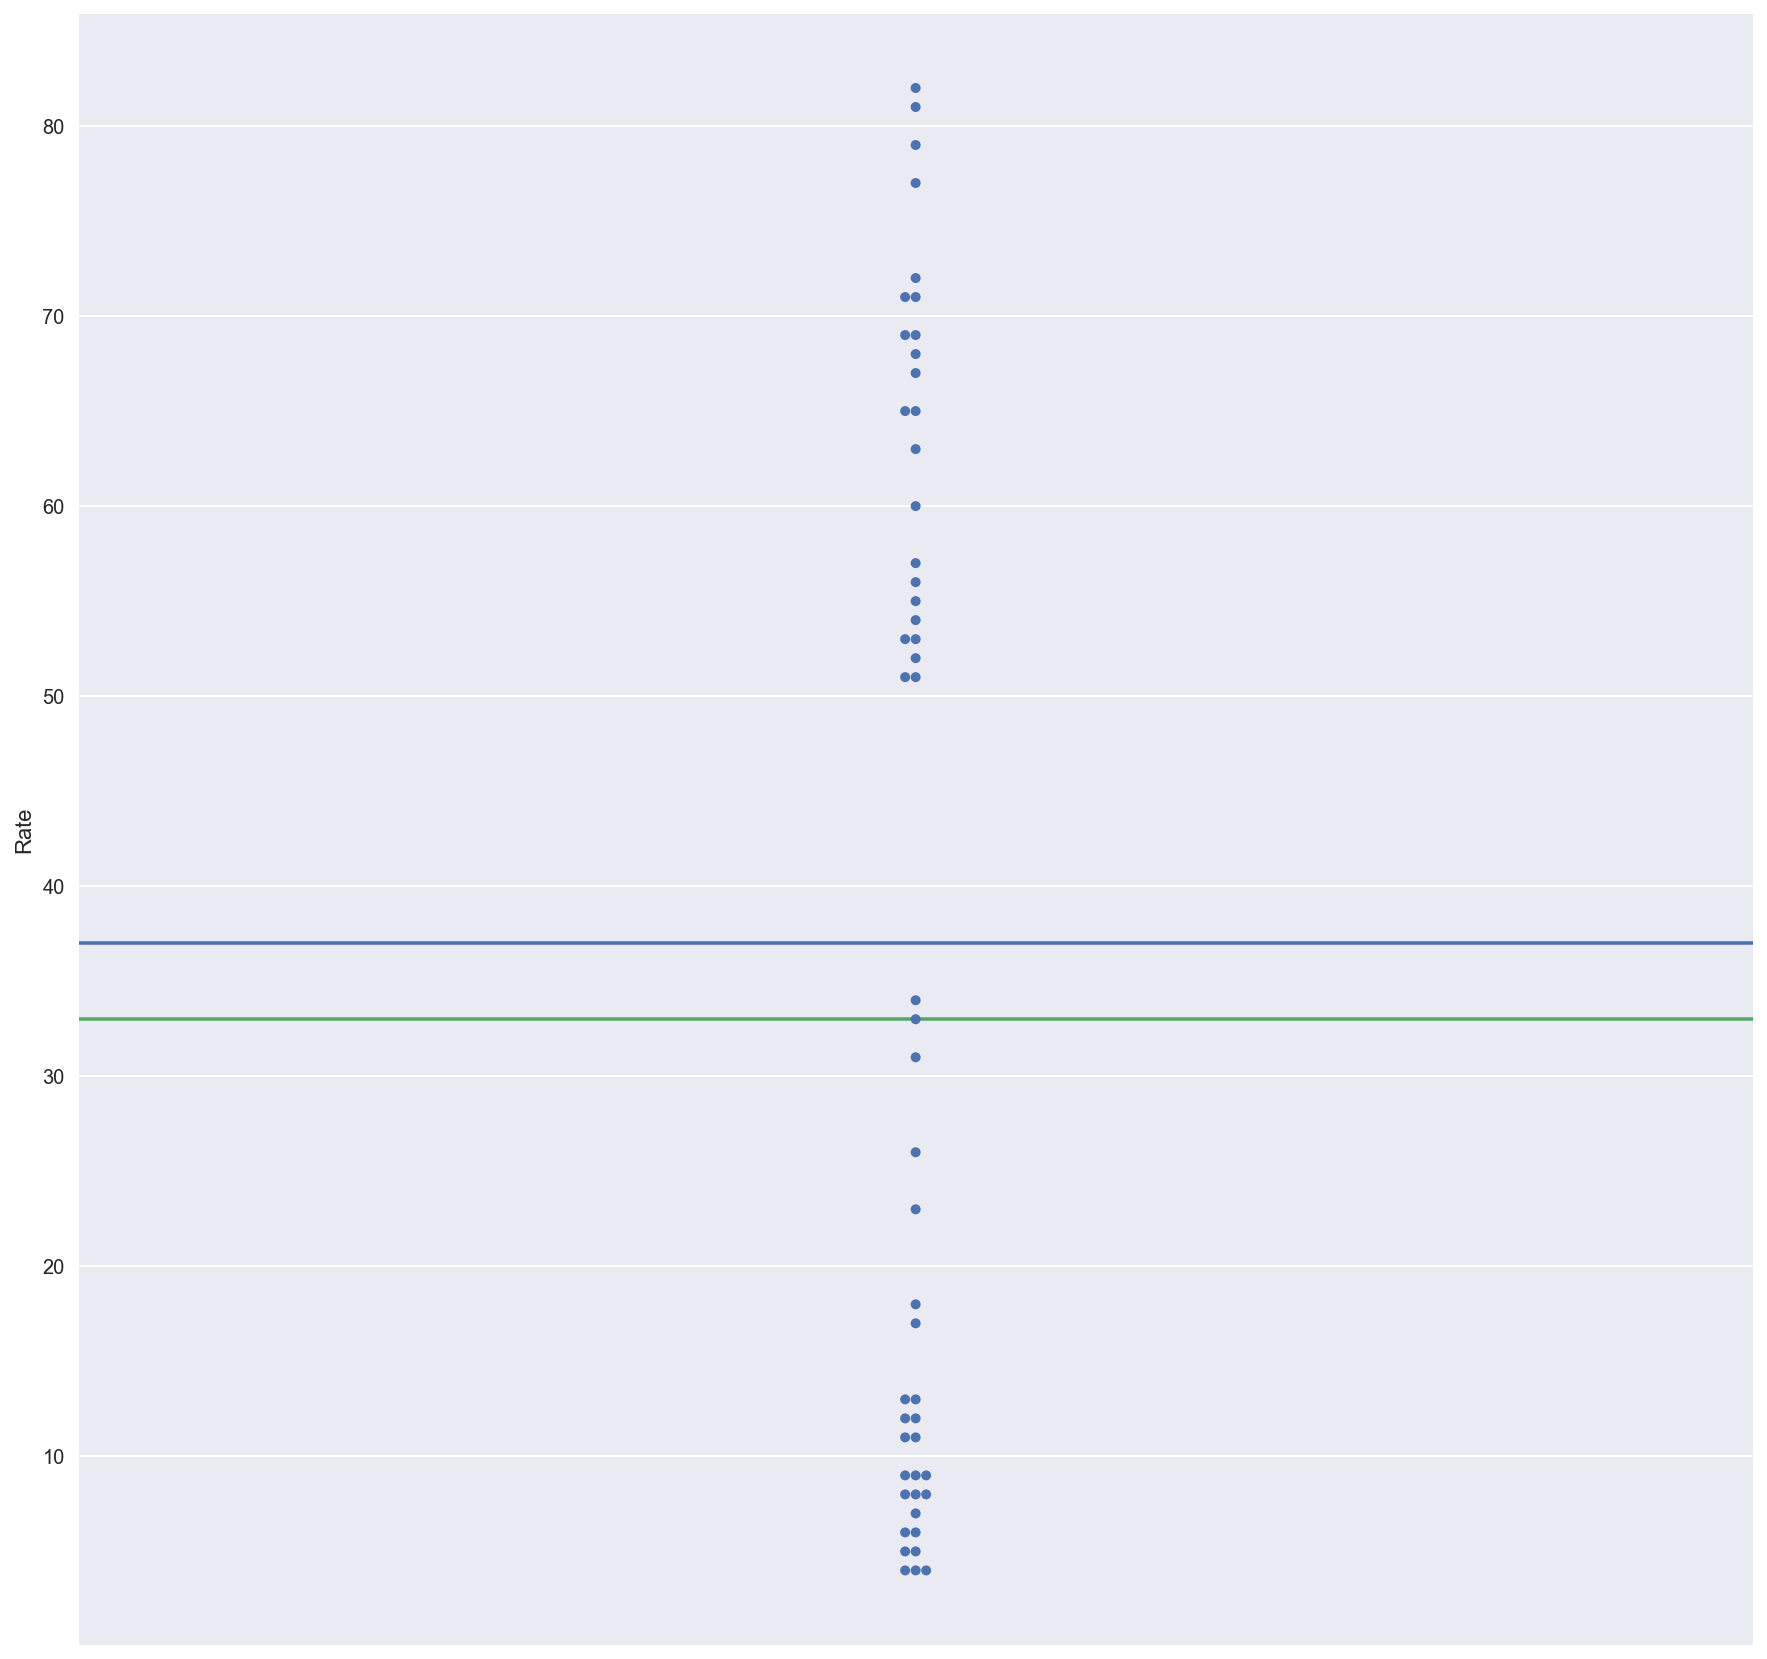

In [81]:
# Plot Swarmplot

sns.swarmplot(rate,orient='v')
mean = plt.plot([-10,10],[rate.mean(),rate.mean()])
median = plt.plot([-10,10],[rate.median(),rate.median()])

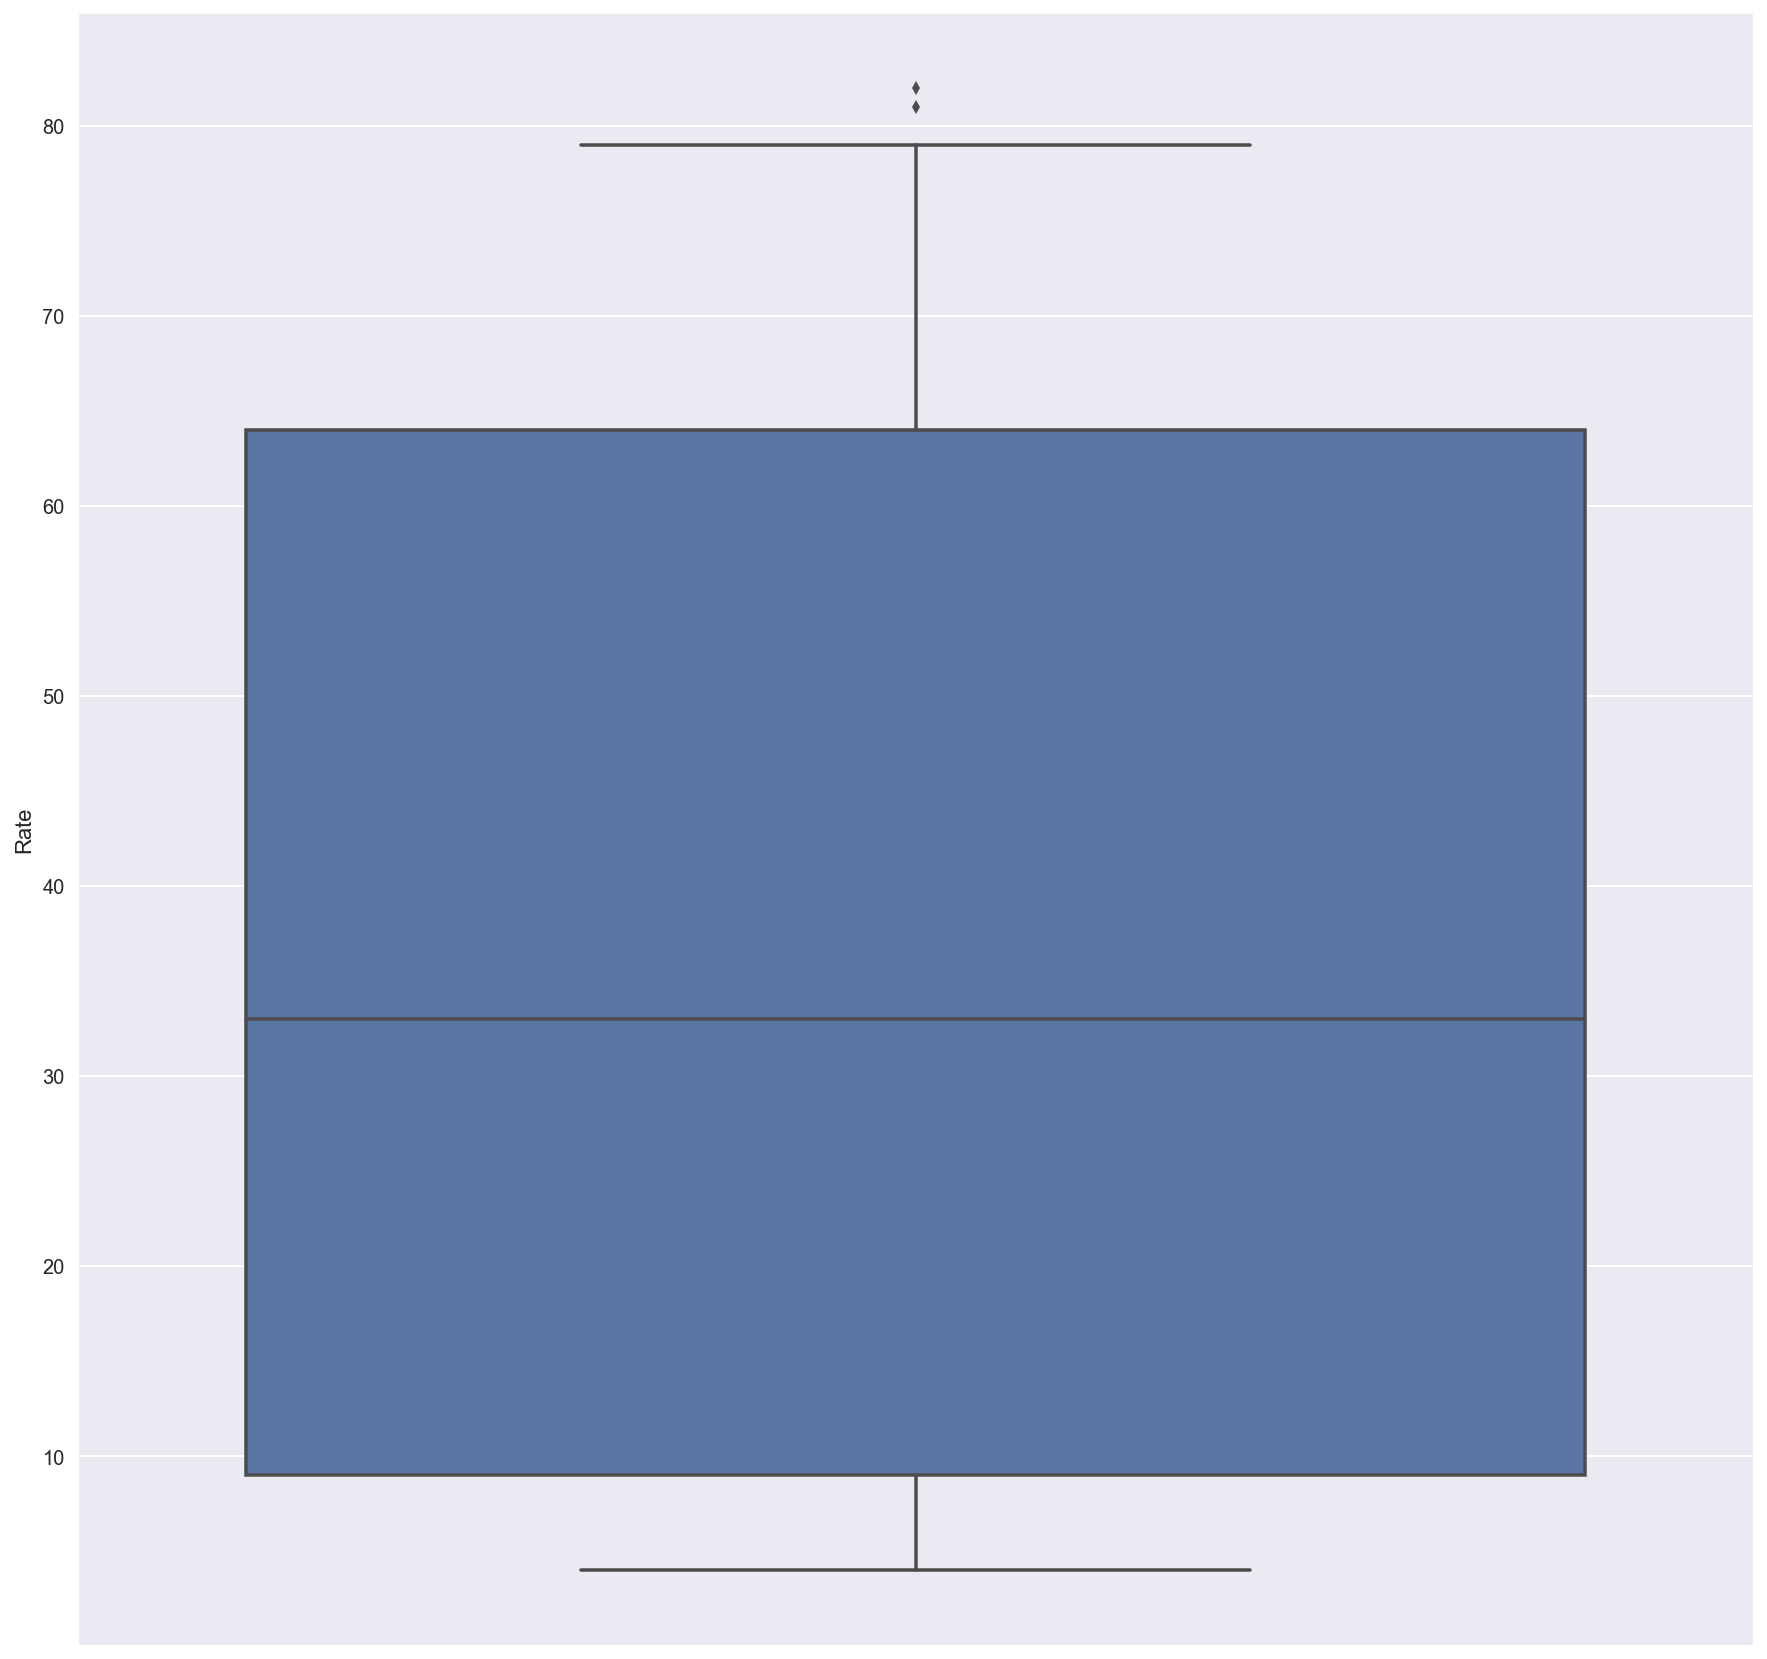

In [84]:
# Plot boxplot with 0.3 IQR

sns.boxplot(rate,whis=0.3,orient='v')

In [85]:
# Print out the outliers

IQR = rate.quantile(q=0.75) - rate.quantile(q=0.25)
outliers = data_pd[rate>(rate.quantile(q=0.75)+(IQR*0.3))]
outliers

,State,Rate,Verbal,Math,Verbal-Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14


In [86]:
# Remove outliers

data_xout = data_pd.drop(rate>(rate.quantile(q=0.75)+(IQR*0.3)),axis=0)
data_xout.describe()

,Rate,Verbal,Math,Verbal-Math
count,49.000000,49.000000,49.000000,49.000000
mean,35.183673,533.693878,532.673469,1.020408
std,26.547656,33.510697,36.791296,16.021457
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,501.000000,-6.000000
50%,31.000000,527.000000,526.000000,0.000000
75%,60.000000,562.000000,561.000000,5.000000
max,79.000000,593.000000,603.000000,95.000000


In [87]:
data_pd.describe()

,Rate,Verbal,Math,Verbal-Math
count,51.000000,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137,0.686275
std,27.550681,33.360667,36.287393,15.839811
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,503.000000,-6.000000
50%,33.000000,527.000000,525.000000,0.000000
75%,64.000000,562.000000,557.500000,4.500000
max,82.000000,593.000000,603.000000,95.000000


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


<img src="https://i.imgur.com/r0JC3KU.png?1" style="float: left; margin: 15px 15px 0px 0px;">
## Solution


---

In [88]:
import scipy.stats
scipy.stats.spearmanr(data_pd.Verbal,data_pd.Math)

SpearmanrResult(correlation=0.9094125143903472, pvalue=2.6565430361616923e-20)

In [89]:
scipy.stats.pearsonr(data_pd.Verbal,data_pd.Math)

(0.89990931818110476, 2.735579353543464e-19)

<div style="width:900px;background:#F9EECF;border:1px solid black;text-align:center;padding:8px;">
<p>
<b>How does the spearman correlation compare to the pearson correlation?</b>
<br><br>
The spearman correlation summarise the strength and direction (negative or positive) of a relationship between two variables.
<br><br>
<b>Method - calculating the coefficient</b>
<br><br>
1. Rank the two data sets. Ranking is achieved by giving the ranking '1' to the biggest number in a column, '2' to the second biggest value and so on. The smallest value in the column will get the lowest ranking. This should be done for both sets of measurements.
<br><br>
2. Tied scores are given the mean (average) rank. 
<br><br>
3. Find the difference in the ranks (d): This is the difference between the ranks of the two values on each row of the table. The rank of the second value (price) is subtracted from the rank of the first (distance from the museum).
<br><br>
4. Square the differences (d²) To remove negative values and then sum them (d²).
<br><br>
5. Calculate the coefficient (R) using the formula below. The answer will always be between 1.0 (a perfect positive correlation) and -1.0 (a perfect negative correlation).
<br>
</p>
<img src="https://geographyfieldwork.com/sprank.gif">

</div>





### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

<img src="https://i.imgur.com/r0JC3KU.png?1" style="float: left; margin: 15px 15px 0px 0px;">
## Solution


---

In [90]:
# Create new column

from scipy import stats

data_pd['rate_percentile'] = [stats.percentileofscore(data_pd.Rate,x) for x in data_pd.Rate]

In [91]:
# Show the percentile of California in Rate.

data_pd[data_pd.State == 'CA']['rate_percentile']

23    55.882353
Name: rate_percentile, dtype: float64


<div style="width:900px;background:#F9EECF;border:1px solid black;text-align:center;padding:8px;">
<p>
The percentile indicates the ranking for the spearman rank correlation.
100% being ranked 1, and so on.
</p>

</div>


### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

<img src="https://i.imgur.com/r0JC3KU.png?1" style="float: left; margin: 15px 15px 0px 0px;">
## Solution


---

<div style="width:900px;background:#F9EECF;border:1px solid black;text-align:center;padding:8px;">
<p>
Percentile scoring normalises ranks the scores into a percentile out of 100% - outliers are ranked within the 100%
</p>

</div>

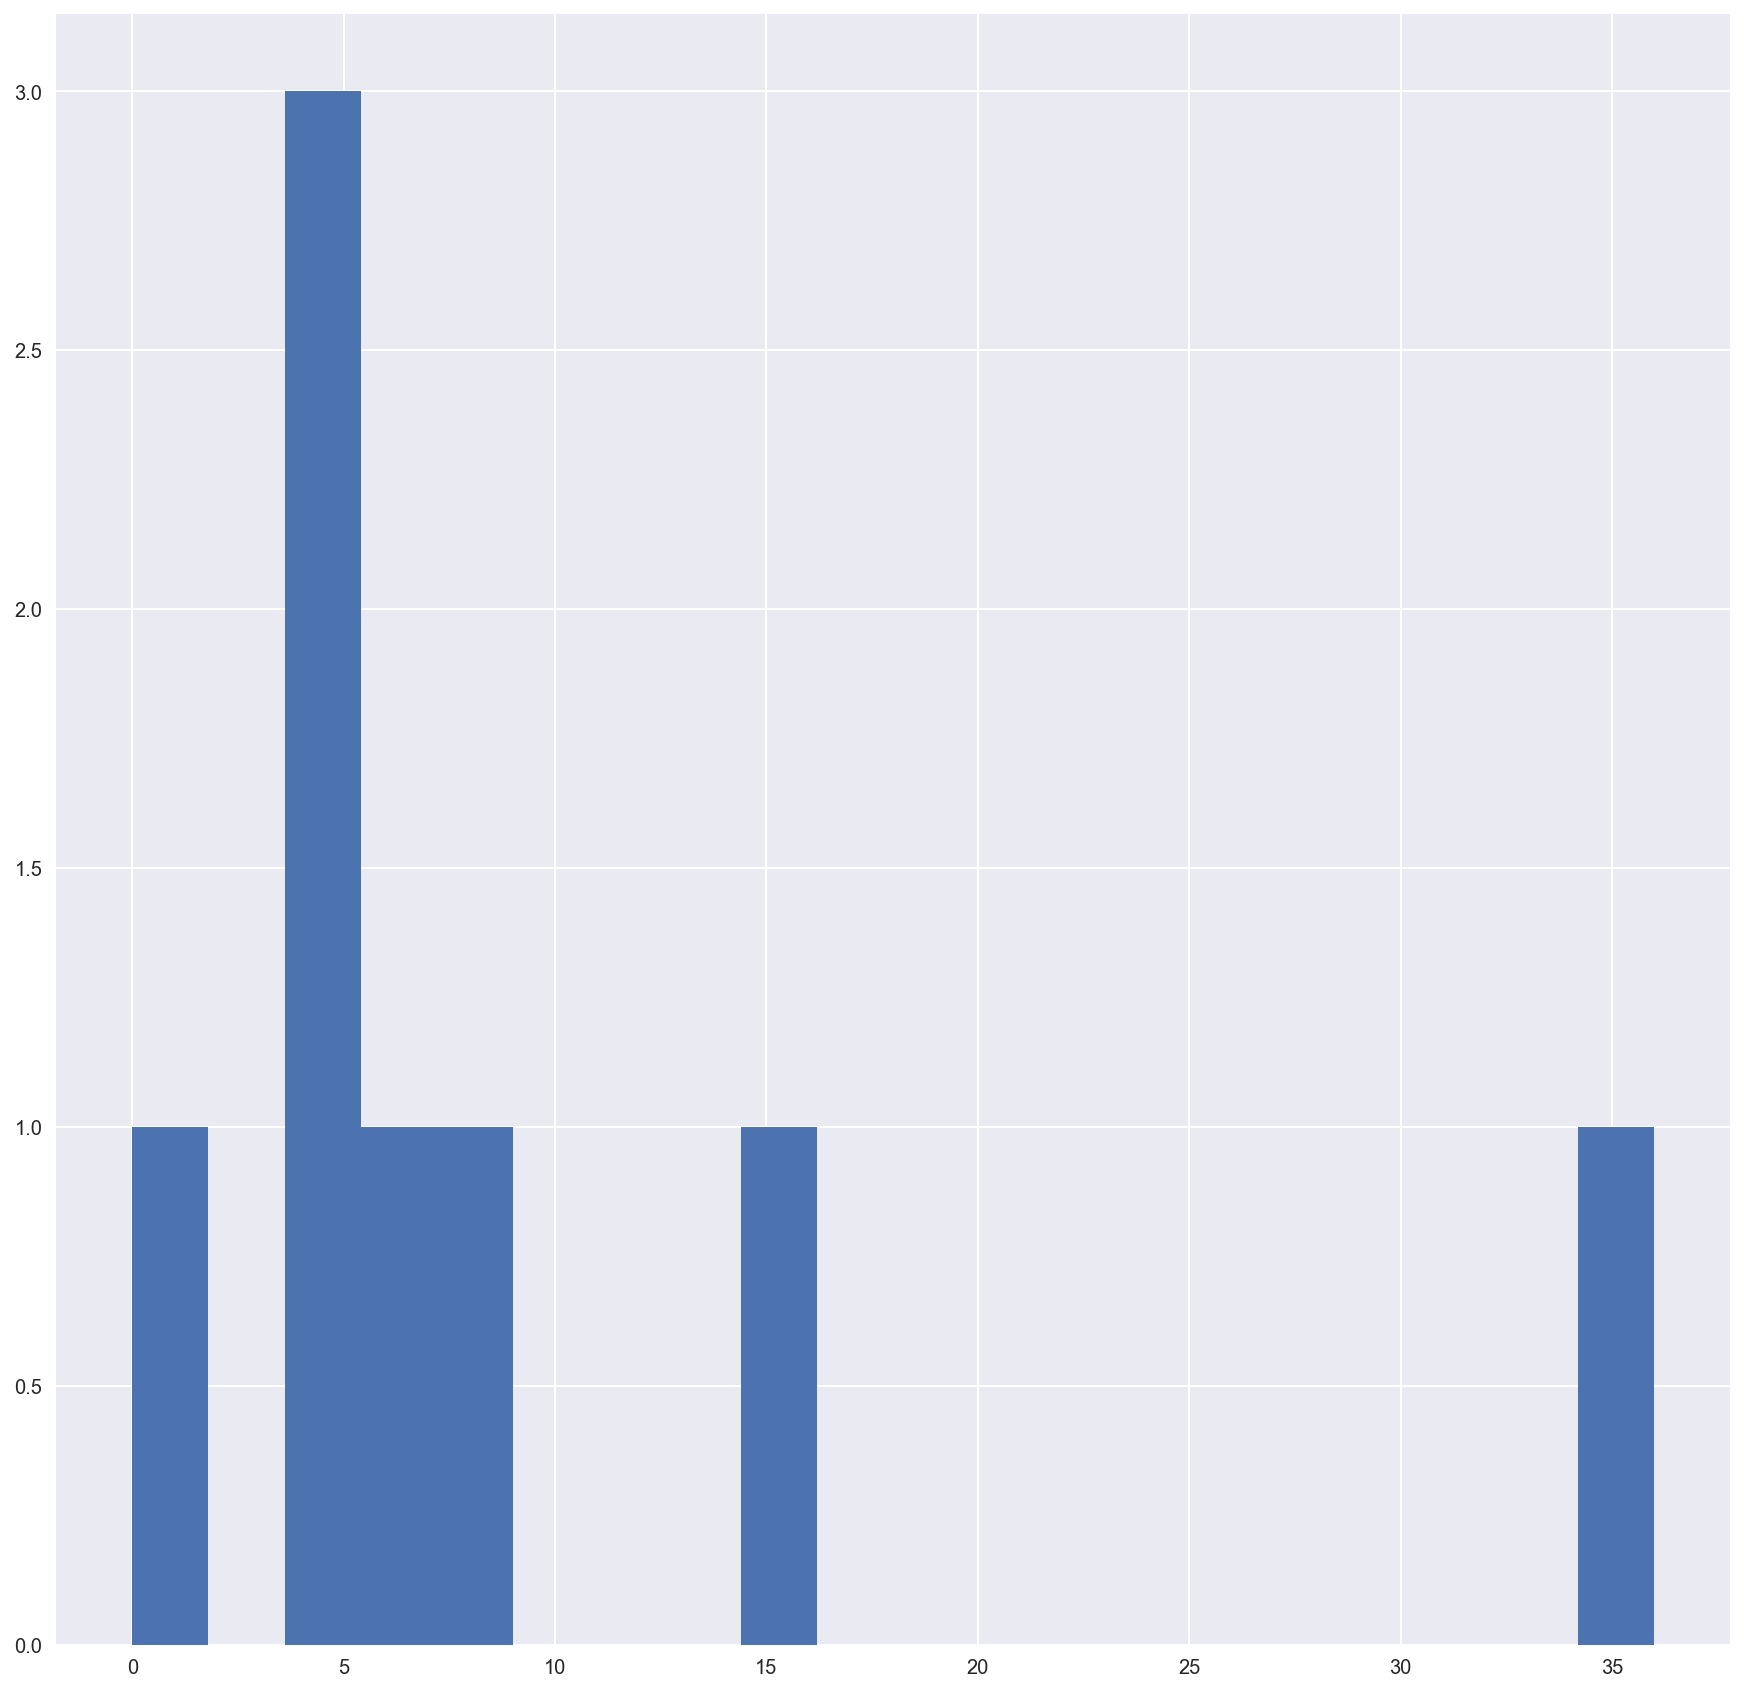

In [188]:
drug_small['cocaine-frequency'].hist(bins = 20)

In [190]:
drug_small['cocaine-frequency-per'] = [stats.percentileofscore(drug_small['cocaine-frequency'],x) for x in drug_small['cocaine-frequency']]

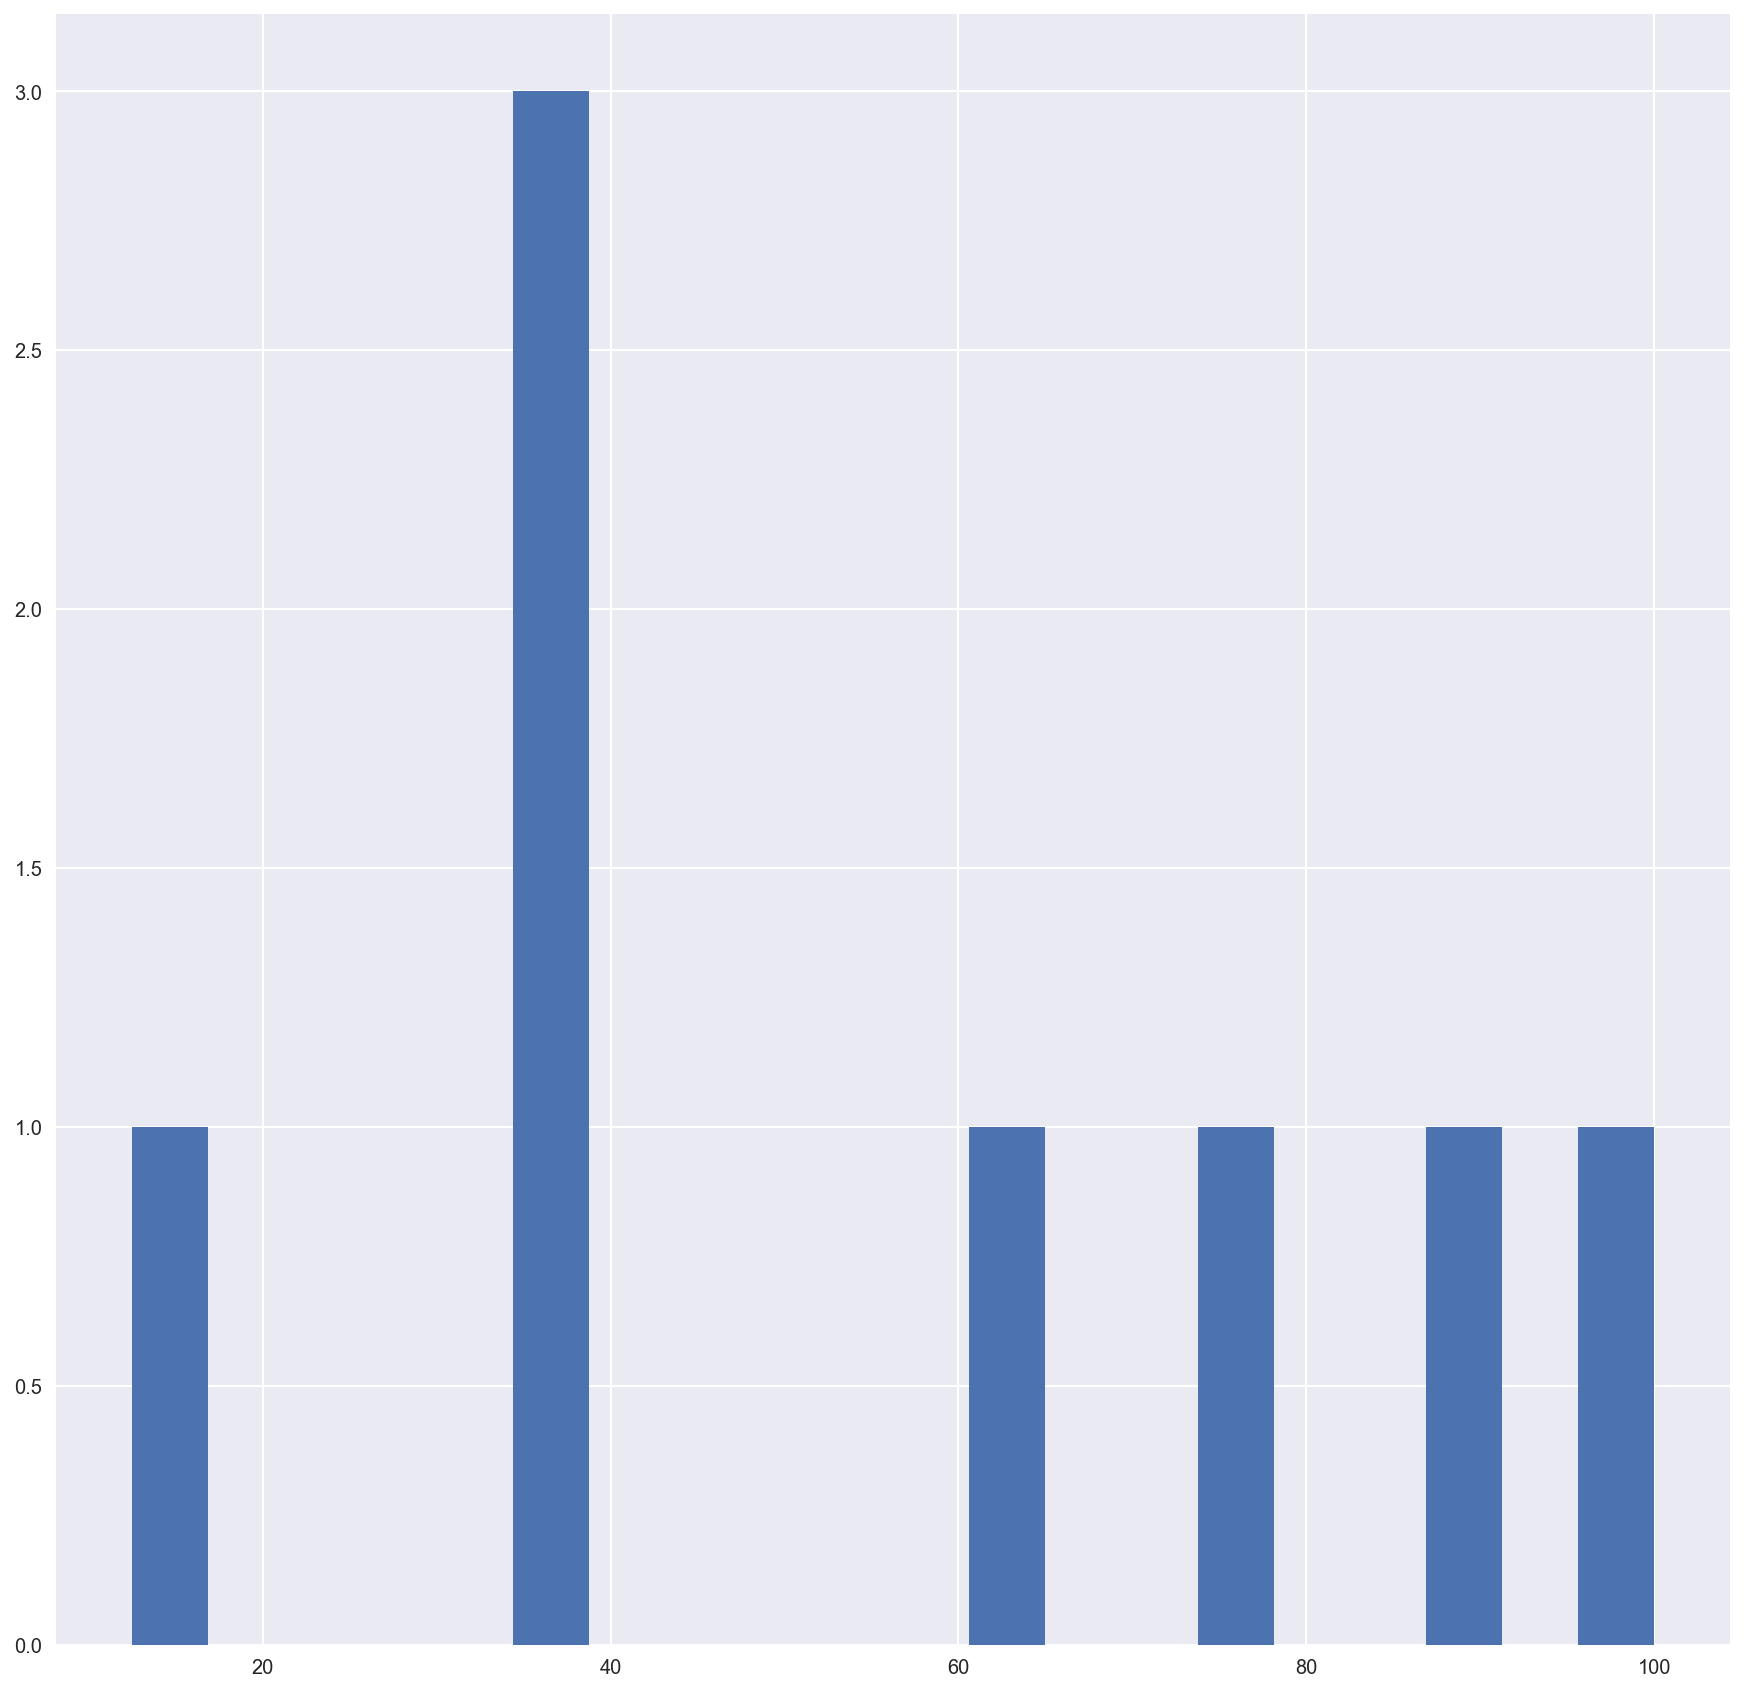

In [191]:
drug_small['cocaine-frequency-per'].hist(bins = 20)